# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "Data/" 


In [13]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
import os
np.load('Data/dataset1_1.npz')


['Data', 'ProgAssmt1_student.ipynb']


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(X_train)
    d = len(X_train[0])
    m = len(X_test)
    up = np.zeros((d,1))
    um = np.zeros((d,1))
    for i in range(n):
        temp = X_train[i].reshape(d,1)
        if Y_train[i]==1:
            up = up + temp
        else:
            um = um + temp
    up = up/(np.count_nonzero(Y_train==1))
    um = um/(np.count_nonzero(Y_train==-1))
    py1 = np.count_nonzero(Y_train==1)/n
    Y_test_pred = np.zeros((m,1))
    for i in range(m):
        temp2 = X_test[i].reshape(d,1)
        fx1 = np.exp(-0.5*np.matmul(((temp2-up).T),(temp2-up)))
        fx2 = np.exp(-0.5*np.matmul(((temp2-um).T),(temp2-um)))
        if fx1*py1 > fx2*(1-py1):
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    return Y_test_pred


    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(X_train)
    d = len(X_train[0])
    m = len(X_test)
    up = np.zeros((d,1))
    um = np.zeros((d,1))
    u = np.zeros((d,1))
    for i in range(n):
        u = u + X_train[i]
    u = u/n
    for i in range(n):
        temp = X_train[i].reshape(d,1)
        if Y_train[i]==1:
            up = up + temp
        else:
            um = um + temp
    up = up/(np.count_nonzero(Y_train==1))
    um = um/(np.count_nonzero(Y_train==-1))
    py1 = np.count_nonzero(Y_train==1)/n
    Y_test_pred = np.zeros((m,1))
    cov = np.zeros((d,d))
    for i in range(n):
        temp3 = X_train[i].reshape(d,1)
        if Y_train[i]==1:
            cov = cov + np.matmul((temp3-up),(temp3-up).T)
        else:
            cov = cov + np.matmul((temp3-um),(temp3-um).T)
    cov = cov/n
    for i in range(m):
        temp2 = X_test[i].reshape(d,1)
        fx1 = np.exp(-0.5*np.matmul(np.matmul((temp2-up).T,np.linalg.inv(cov)),(temp2-up)))/np.sqrt(np.linalg.det(cov))
        fx2 = np.exp(-0.5*np.matmul(np.matmul((temp2-um).T,np.linalg.inv(cov)),(temp2-um)))/np.sqrt(np.linalg.det(cov))
        if fx1*py1 > fx2*(1-py1):
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1

    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = len(X_train)
    d = len(X_train[0])
    m = len(X_test)
    up = np.zeros((d,1))
    um = np.zeros((d,1))
    for i in range(n):
        temp = X_train[i].reshape(d,1)
        if Y_train[i]==1:
            up = up + temp
        else:
            um = um + temp
    up = up/(np.count_nonzero(Y_train==1))
    um = um/(np.count_nonzero(Y_train==-1))
    py1 = np.count_nonzero(Y_train==1)/n
    Y_test_pred = np.zeros((m,1))
    covp = np.zeros((d,d))
    covm = np.zeros((d,d))
    for i in range(n):
        temp3 = X_train[i].reshape(d,1)
        if Y_train[i]==1:
            covp = covp + np.matmul((temp3-up),(temp3-up).T)
        else:
            covm = covm + np.matmul((temp3-um),(temp3-um).T)
    covp = covp/(np.count_nonzero(Y_train==1))
    covm = covm/(np.count_nonzero(Y_train==-1))
    for i in range(m):
        temp2 = X_test[i].reshape(d,1)
        fx1 = np.exp(-0.5*np.matmul(np.matmul((temp2-up).T,np.linalg.inv(covp)),(temp2-up)))/np.sqrt(np.linalg.det(covp))
        fx2 = np.exp(-0.5*np.matmul(np.matmul((temp2-um).T,np.linalg.inv(covm)),(temp2-um)))/np.sqrt(np.linalg.det(covm))
        if fx1*py1 > fx2*(1-py1):
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    
    return Y_test_pred


    
    




In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


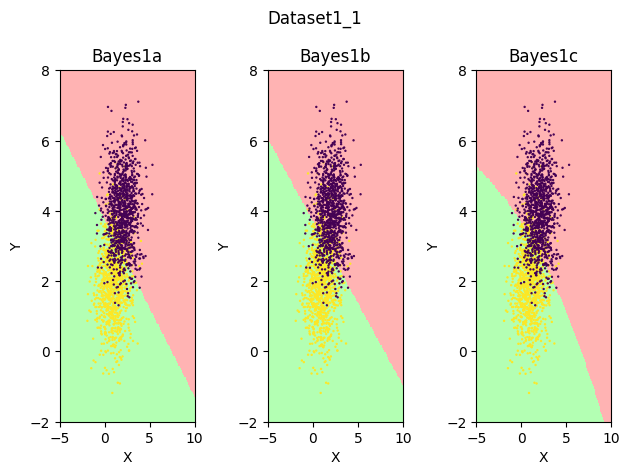

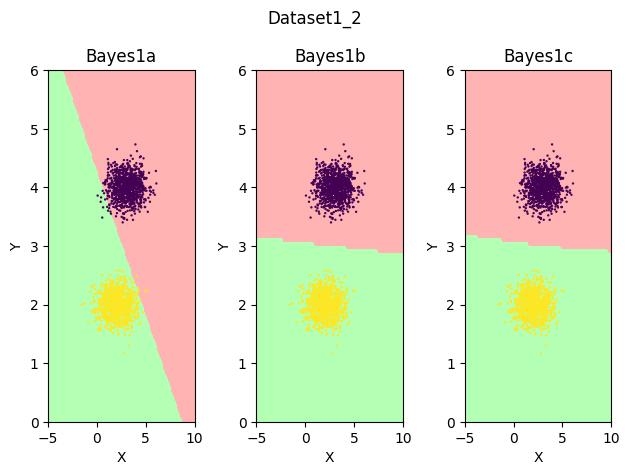

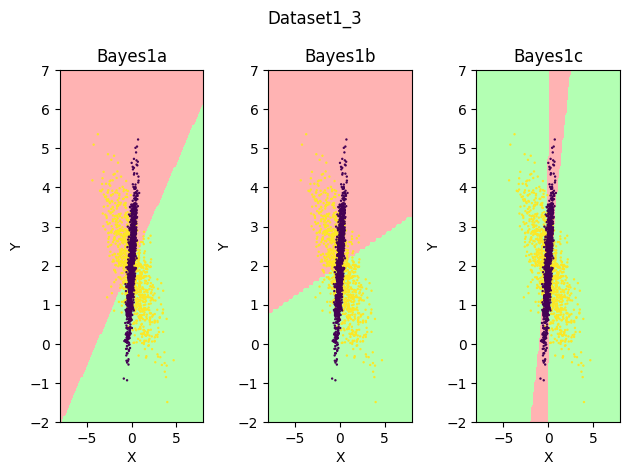

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
data1 = np.load('Data/dataset1_1.npz')
X_train1 = data1['arr_0']
Y_train1 = data1['arr_1']
X_test1 = data1['arr_2']
Y_test1 = data1['arr_3']
Y_test1 = Y_test1.reshape(2000,1)

data2 = np.load('Data/dataset1_2.npz')
X_train2 = data2['arr_0']
Y_train2 = data2['arr_1']
X_test2 = data2['arr_2']
Y_test2 = data2['arr_3'].reshape(2000,1)

data3 = np.load('Data/dataset1_3.npz')
X_train3 = data3['arr_0']
Y_train3 = data3['arr_1']
X_test3 = data3['arr_2']
Y_test3 = data3['arr_3'].reshape(2000,1)

#Plot for dataset1_1
plt.subplot(1,3,1)
X,Y = np.meshgrid(np.linspace(-5,10,100),np.linspace(-2,8,100))
Z = Bayes1a(X_train1,Y_train1,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
plt.title('Bayes1a')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train1[:,0],X_train1[:,1],s=0.5,c=Y_train1)
#plt.show()

plt.subplot(1,3,2)
#X,Y = np.meshgrid(np.linspace(-3,8,100),np.linspace(-2.5,8,100))
Z = Bayes1b(X_train1,Y_train1,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
plt.title('Bayes1b')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train1[:,0],X_train1[:,1],s=0.5,c=Y_train1)
#plt.show()

plt.subplot(1,3,3)
#X,Y = np.meshgrid(np.linspace(-3,8,100),np.linspace(-2.5,8,100))
Z = Bayes1c(X_train1,Y_train1,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
plt.title('Bayes1c')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train1[:,0],X_train1[:,1],s=0.5,c=Y_train1)
plt.suptitle('Dataset1_1')
plt.tight_layout()
plt.show()

#Plot for dataset1_2
plt.subplot(1,3,1)
X,Y = np.meshgrid(np.linspace(-5,10,100),np.linspace(0,6,100))
Z = Bayes1a(X_train2,Y_train2,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
plt.title('Bayes1a')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train2[:,0],X_train2[:,1],s=0.5,c=Y_train2)
#plt.show()

plt.subplot(1,3,2)
#X,Y = np.meshgrid(np.linspace(-3,8,100),np.linspace(-2.5,8,100))
Z = Bayes1b(X_train2,Y_train2,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
plt.title('Bayes1b')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train2[:,0],X_train2[:,1],s=0.5,c=Y_train2)
#plt.show()

plt.subplot(1,3,3)
#X,Y = np.meshgrid(np.linspace(-3,8,100),np.linspace(-2.5,8,100))
Z = Bayes1c(X_train2,Y_train2,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
plt.title('Bayes1c')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train2[:,0],X_train2[:,1],s=0.5,c=Y_train2)
plt.suptitle('Dataset1_2')
plt.tight_layout()
plt.show()

#Plot for dataset1_3
plt.subplot(1,3,1)
X,Y = np.meshgrid(np.linspace(-8,8,100),np.linspace(-2,7,100))
Z = Bayes1a(X_train3,Y_train3,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
plt.title('Bayes1a')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train3[:,0],X_train3[:,1],s=0.5,c=Y_train3)
#plt.show()

plt.subplot(1,3,2)
#X,Y = np.meshgrid(np.linspace(-3,8,100),np.linspace(-2.5,8,100))
Z = Bayes1b(X_train3,Y_train3,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
plt.title('Bayes1b')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train3[:,0],X_train3[:,1],s=0.5,c=Y_train3)
#plt.show()

plt.subplot(1,3,3)
#X,Y = np.meshgrid(np.linspace(-3,8,100),np.linspace(-2.5,8,100))
Z = Bayes1c(X_train3,Y_train3,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,levels=[-1,0,1],colors = [(1,0.7,0.7),(0.7,1,0.7)])
plt.title('Bayes1c')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train3[:,0],X_train3[:,1],s=0.5,c=Y_train3)
plt.suptitle('Dataset1_3')
plt.tight_layout()
plt.show()

Y_pred1a = Bayes1a(X_train1,Y_train1,X_test1)
Y_pred1b = Bayes1b(X_train1,Y_train1,X_test1)
Y_pred1c = Bayes1c(X_train1,Y_train1,X_test1)

Y_pred2a = Bayes1a(X_train2, Y_train2, X_test2)
Y_pred2b = Bayes1b(X_train2, Y_train2, X_test2)
Y_pred2c = Bayes1c(X_train2, Y_train2, X_test2)

Y_pred3a = Bayes1a(X_train3, Y_train3, X_test3)
Y_pred3b = Bayes1b(X_train3, Y_train3, X_test3)
Y_pred3c = Bayes1c(X_train3, Y_train3, X_test3)






Observations:
1. The error rate for same mean and covaraince as I is the highest and error rate for different mean and different unknown covariance is the lowest.
2. It is observed that Bayes1a and Bayes2a are unsuccesful in Dataset3 as the data given is not linearly seperable.

Error rates for the three classifiers on the three datasets are given below:

| Error_rate | Bayes1a | Bayes1b | Bayes1c |
| --- | --- | --- | --- |
| Dataset1_1 | 0.126 | 0.1245 | 0.1245 |
| Dataset1_2 | 0.0085 | 0.0 | 0.0 |
| Dataset1_3 | 0.497 | 0.495 | 0.135 |




** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    m = X_test.shape[0]
    d = X_train.shape[1]
    Y_test_pred = np.zeros(m)
    py1 = np.count_nonzero(Y_train == 1)/n
    py2 = np.count_nonzero(Y_train == 2)/n
    py3 = np.count_nonzero(Y_train == 3)/n
    py4 = np.count_nonzero(Y_train == 4)/n
    u1 = np.zeros((d,1))
    u2 = np.zeros((d,1))
    u3 = np.zeros((d,1))
    u4 = np.zeros((d,1))
    for i in range(n):
        if Y_train[i] == 1:
            u1 = u1 + X_train[i].reshape(d,1)
        elif Y_train[i] == 2:
            u2 = u2 + X_train[i].reshape(d,1)
        elif Y_train[i] == 3:
            u3 = u3 + X_train[i].reshape(d,1)
        else:
            u4 = u4 + X_train[i].reshape(d,1)
    u1 = u1/np.count_nonzero(Y_train == 1)
    u2 = u2/np.count_nonzero(Y_train == 2)
    u3 = u3/np.count_nonzero(Y_train == 3)
    u4 = u4/np.count_nonzero(Y_train == 4)
    for i in range(m):
        x = X_test[i].reshape(d,1)
        fx1 = np.exp(-0.5*np.matmul((x-u1).T,(x-u1)))/np.sqrt(2*np.pi)
        fx2 = np.exp(-0.5*np.matmul((x-u2).T,(x-u2)))/np.sqrt(2*np.pi)
        fx3 = np.exp(-0.5*np.matmul((x-u3).T,(x-u3)))/np.sqrt(2*np.pi)
        fx4 = np.exp(-0.5*np.matmul((x-u4).T,(x-u4)))/np.sqrt(2*np.pi)
        fx = np.array([fx1[0][0]*py1,fx2[0]*py2,fx3[0]*py3,fx4[0]*py4])
        fx = fx/np.sum(fx)
        Loss = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
        Y_test_pred[i] = np.argmin(np.matmul(fx,Loss))+1
    return Y_test_pred
    

    
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    m = X_test.shape[0]
    d = X_train.shape[1]
    Y_test_pred = np.zeros(m)
    py1 = np.count_nonzero(Y_train == 1)/n
    py2 = np.count_nonzero(Y_train == 2)/n
    py3 = np.count_nonzero(Y_train == 3)/n
    py4 = np.count_nonzero(Y_train == 4)/n
    u1 = np.zeros((d,1))
    u2 = np.zeros((d,1))
    u3 = np.zeros((d,1))
    u4 = np.zeros((d,1))
    for i in range(n):
        if Y_train[i] == 1:
            u1 = u1 + X_train[i].reshape(d,1)
        elif Y_train[i] == 2:
            u2 = u2 + X_train[i].reshape(d,1)
        elif Y_train[i] == 3:
            u3 = u3 + X_train[i].reshape(d,1)
        else:
            u4 = u4 + X_train[i].reshape(d,1)
    u1 = u1/np.count_nonzero(Y_train == 1)
    u2 = u2/np.count_nonzero(Y_train == 2)
    u3 = u3/np.count_nonzero(Y_train == 3)
    u4 = u4/np.count_nonzero(Y_train == 4)
    cov = np.zeros((d,d))
    for i in range(n):
        if Y_train[i] == 1:
            cov = cov + np.matmul((X_train[i].reshape(d,1)-u1),(X_train[i].reshape(d,1)-u1).T)
        elif Y_train[i] == 2:
            cov = cov + np.matmul((X_train[i].reshape(d,1)-u2),(X_train[i].reshape(d,1)-u2).T)
        elif Y_train[i] == 3:
            cov = cov + np.matmul((X_train[i].reshape(d,1)-u3),(X_train[i].reshape(d,1)-u3).T)
        else:
            cov = cov + np.matmul((X_train[i].reshape(d,1)-u4),(X_train[i].reshape(d,1)-u4).T)
    cov = cov/n
    for i in range(m):
        x = X_test[i].reshape(d,1)
        fx1 = np.exp(-0.5*np.matmul(np.matmul((x-u1).T,np.linalg.inv(cov)),(x-u1)))
        fx2 = np.exp(-0.5*np.matmul(np.matmul((x-u2).T,np.linalg.inv(cov)),(x-u2)))
        fx3 = np.exp(-0.5*np.matmul(np.matmul((x-u3).T,np.linalg.inv(cov)),(x-u3)))
        fx4 = np.exp(-0.5*np.matmul(np.matmul((x-u4).T,np.linalg.inv(cov)),(x-u4)))
        fx = np.array([fx1[0][0]*py1,fx2[0]*py2,fx3[0]*py3,fx4[0]*py4])
        fx = fx/np.sum(fx)
        Loss = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
        Y_test_pred[i] = np.argmin(np.matmul(fx,Loss))+1

    return Y_test_pred
    


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    m = X_test.shape[0]
    d = X_train.shape[1]
    Y_test_pred = np.zeros(m)
    py1 = np.count_nonzero(Y_train == 1)/n
    py2 = np.count_nonzero(Y_train == 2)/n
    py3 = np.count_nonzero(Y_train == 3)/n
    py4 = np.count_nonzero(Y_train == 4)/n
    u1 = np.zeros((d,1))
    u2 = np.zeros((d,1))
    u3 = np.zeros((d,1))
    u4 = np.zeros((d,1))
    for i in range(n):
        if Y_train[i] == 1:
            u1 = u1 + X_train[i].reshape(d,1)
        elif Y_train[i] == 2:
            u2 = u2 + X_train[i].reshape(d,1)
        elif Y_train[i] == 3:
            u3 = u3 + X_train[i].reshape(d,1)
        else:
            u4 = u4 + X_train[i].reshape(d,1)
    u1 = u1/np.count_nonzero(Y_train == 1)
    u2 = u2/np.count_nonzero(Y_train == 2)
    u3 = u3/np.count_nonzero(Y_train == 3)
    u4 = u4/np.count_nonzero(Y_train == 4)
    cov1 = np.zeros((d,d))
    cov2 = np.zeros((d,d))
    cov3 = np.zeros((d,d))
    cov4 = np.zeros((d,d))
    for i in range(n):
        if Y_train[i] == 1:
            cov1 = cov1 + np.matmul((X_train[i].reshape(d,1)-u1),(X_train[i].reshape(d,1)-u1).T)
        elif Y_train[i] == 2:
            cov2 = cov2 + np.matmul((X_train[i].reshape(d,1)-u2),(X_train[i].reshape(d,1)-u2).T)
        elif Y_train[i] == 3:
            cov3 = cov3 + np.matmul((X_train[i].reshape(d,1)-u3),(X_train[i].reshape(d,1)-u3).T)
        else:
            cov4 = cov4 + np.matmul((X_train[i].reshape(d,1)-u4),(X_train[i].reshape(d,1)-u4).T)
    cov1 = cov1/np.count_nonzero(Y_train == 1)
    cov2 = cov2/np.count_nonzero(Y_train == 2)
    cov3 = cov3/np.count_nonzero(Y_train == 3)
    cov4 = cov4/np.count_nonzero(Y_train == 4)
    for i in range(m):
        x = X_test[i].reshape(d,1)
        fx1 = np.exp(-0.5*np.matmul(np.matmul((x-u1).T,np.linalg.inv(cov1)),(x-u1)))/np.sqrt(np.linalg.det(cov1))
        fx2 = np.exp(-0.5*np.matmul(np.matmul((x-u2).T,np.linalg.inv(cov2)),(x-u2)))/np.sqrt(np.linalg.det(cov2))
        fx3 = np.exp(-0.5*np.matmul(np.matmul((x-u3).T,np.linalg.inv(cov3)),(x-u3)))/np.sqrt(np.linalg.det(cov3))
        fx4 = np.exp(-0.5*np.matmul(np.matmul((x-u4).T,np.linalg.inv(cov4)),(x-u4)))/np.sqrt(np.linalg.det(cov4))
        fx = np.array([fx1[0][0]*py1,fx2[0]*py2,fx3[0]*py3,fx4[0]*py4])
        fx = fx/np.sum(fx)
        Loss = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
        Y_test_pred[i] = np.argmin(np.matmul(fx,Loss))+1

    return Y_test_pred
    

    
    


    


In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



/tmp/ipykernel_7265/3025358348.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fx = np.array([fx1[0][0]*py1,fx2[0]*py2,fx3[0]*py3,fx4[0]*py4])
/tmp/ipykernel_7265/3025358348.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fx = np.array([fx1[0][0]*py1,fx2[0]*py2,fx3[0]*py3,fx4[0]*py4])
/tmp/ipykernel_7265/3025358348.py:183: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spec

**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


/tmp/ipykernel_7265/3025358348.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fx = np.array([fx1[0][0]*py1,fx2[0]*py2,fx3[0]*py3,fx4[0]*py4])
/tmp/ipykernel_7265/3025358348.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fx = np.array([fx1[0][0]*py1,fx2[0]*py2,fx3[0]*py3,fx4[0]*py4])
/tmp/ipykernel_7265/3025358348.py:183: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spec

For 1 data point color is red, counterf color is purple
For 2 data point color is blue, counterf color is dull blue
For 3 data point color is green, counterf color is light green
For 4 data point color is yellow, counterf color is dull yellow


/tmp/ipykernel_7265/2723536470.py:112: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(X,Y,Z,color = Y_train2)
/tmp/ipykernel_7265/2723536470.py:121: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(X,Y,Z,color = Y_train2)
/tmp/ipykernel_7265/2723536470.py:130: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(X,Y,Z,color = Y_train2)


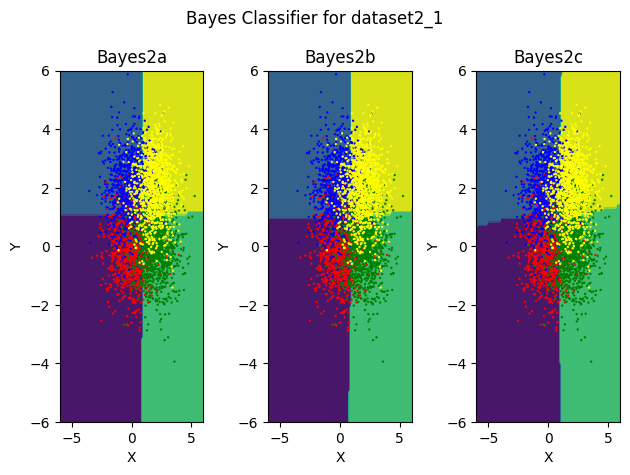

/tmp/ipykernel_7265/3025358348.py:50: RuntimeWarning: invalid value encountered in double_scalars
  fx = fx/np.sum(fx)
/tmp/ipykernel_7265/3025358348.py:50: RuntimeWarning: invalid value encountered in divide
  fx = fx/np.sum(fx)
/tmp/ipykernel_7265/2723536470.py:146: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(X,Y,Z,color = Y_train3)
/tmp/ipykernel_7265/2723536470.py:155: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(X,Y,Z,color = Y_train3)
/tmp/ipykernel_7265/2723536470.py:164: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contourf(X,Y,Z,color = Y_train3)


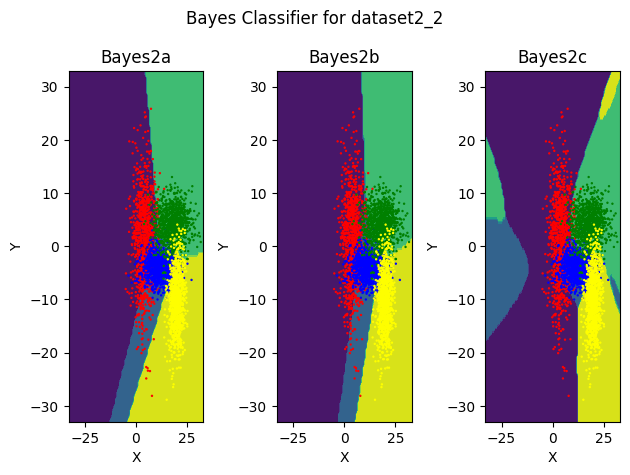

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
dataset2_1=np.load('Data/dataset2_1.npz')
X_train2=dataset2_1['arr_0']
Y_train2=dataset2_1['arr_1']
X_test2=dataset2_1['arr_2']
Y_test2=dataset2_1['arr_3']

dataset2_2=np.load('Data/dataset2_2.npz')
X_train3=dataset2_2['arr_0']
Y_train3=dataset2_2['arr_1']
X_test3=dataset2_2['arr_2']
Y_test3=dataset2_2['arr_3']


Y_pred_test2_2a = Bayes2a(X_train2, Y_train2, X_test2)
Y_pred_test2_2b = Bayes2b(X_train2, Y_train2, X_test2)
Y_pred_test2_2c = Bayes2c(X_train2, Y_train2, X_test2)

Y_pred_test3_2a = Bayes2a(X_train3, Y_train3, X_test3)
Y_pred_test3_2b = Bayes2b(X_train3, Y_train3, X_test3)
Y_pred_test3_2c = Bayes2c(X_train3, Y_train3, X_test3)

""" For calculating the confustion matrix
Confusion_matrix2_2a = np.zeros((4,4))
Confusion_matrix2_2b = np.zeros((4,4))
Confusion_matrix2_2c = np.zeros((4,4))

Confusion_matrix3_2a = np.zeros((4,4))
Confusion_matrix3_2b = np.zeros((4,4))
Confusion_matrix3_2c = np.zeros((4,4))

for i in range(0,4000):
    Confusion_matrix2_2a[int(Y_test2[i])-1][int(Y_pred_test2_2a[i])-1] += 1
    Confusion_matrix2_2b[int(Y_test2[i])-1][int(Y_pred_test2_2b[i])-1] += 1
    Confusion_matrix2_2c[int(Y_test2[i])-1][int(Y_pred_test2_2c[i])-1] += 1
    Confusion_matrix3_2a[int(Y_test3[i])-1][int(Y_pred_test3_2a[i])-1] += 1
    Confusion_matrix3_2b[int(Y_test3[i])-1][int(Y_pred_test3_2b[i])-1] += 1
    Confusion_matrix3_2c[int(Y_test3[i])-1][int(Y_pred_test3_2c[i])-1] += 1

print(Confusion_matrix2_2a)
print(Confusion_matrix2_2b)
print(Confusion_matrix2_2c)
print(Confusion_matrix3_2a)
print(Confusion_matrix3_2b)
print(Confusion_matrix3_2c)
"""


""" For calculating the accuracy of the model 
Loss_matrix = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
#Expected Losses
m2 = X_test2.shape[0]
m3 = X_test3.shape[0]

Loss2a = np.zeros((m2,1))
Loss2b = np.zeros((m2,1))
Loss2c = np.zeros((m2,1))

for i in range(m2):
    Loss2a[i] = Loss_matrix[int(Y_test2[i]-1),int(Y_pred_test2_2a[i]-1)]
    Loss2b[i] = Loss_matrix[int(Y_test2[i]-1),int(Y_pred_test2_2b[i]-1)]
    Loss2c[i] = Loss_matrix[int(Y_test2[i]-1),int(Y_pred_test2_2c[i]-1)]

expectedloss2a = np.sum(Loss2a)/m2
expectedloss2b = np.sum(Loss2b)/m2
expectedloss2c = np.sum(Loss2c)/m2

Loss3a = np.zeros((m3,1))
Loss3b = np.zeros((m3,1))
Loss3c = np.zeros((m3,1))

for i in range(m3):
    Loss3a[i] = Loss_matrix[int(Y_test3[i]-1),int(Y_pred_test3_2a[i]-1)]
    Loss3b[i] = Loss_matrix[int(Y_test3[i]-1),int(Y_pred_test3_2b[i]-1)]
    Loss3c[i] = Loss_matrix[int(Y_test3[i]-1),int(Y_pred_test3_2c[i]-1)]

expectedloss3a = np.sum(Loss3a)/m3
expectedloss3b = np.sum(Loss3b)/m3
expectedloss3c = np.sum(Loss3c)/m3

expectedloss = np.array([[expectedloss2a, expectedloss2b, expectedloss2c],[expectedloss3a, expectedloss3b, expectedloss3c]])
print(expectedloss)
"""


def color(lst):
    color=[]
    for i in lst:
        if i==1:
            color.append('red')
        elif i==2:
            color.append('blue')
        elif i==3:
            color.append('green')
        else:
            color.append('yellow')
    return color

print("=========================================================")
print("For 1 data point color is red, counterf color is purple")
print("For 2 data point color is blue, counterf color is dull blue")
print("For 3 data point color is green, counterf color is light green")
print("For 4 data point color is yellow, counterf color is dull yellow")
print("=========================================================")

plt.subplot(1,3,1)
X,Y = np.meshgrid(np.linspace(-6,6,100),np.linspace(-6,6,100))
Z = Bayes2a(X_train2,Y_train2,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,color = Y_train2)
plt.title('Bayes2a')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train2[:,0],X_train2[:,1],s=0.5,c=color(Y_train2))

plt.subplot(1,3,2)
Z = Bayes2b(X_train2,Y_train2,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,color = Y_train2)
plt.title('Bayes2b')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train2[:,0],X_train2[:,1],s=0.5,c=color(Y_train2))

plt.subplot(1,3,3)
Z = Bayes2c(X_train2,Y_train2,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,color = Y_train2)
plt.title('Bayes2c')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train2[:,0],X_train2[:,1],s=0.5,c=color(Y_train2))
plt.suptitle('Bayes Classifier for dataset2_1')
plt.tight_layout()
print("=========================================================")
plt.show()

print("=========================================================")

plt.subplot(1,3,1)
X,Y = np.meshgrid(np.linspace(-33,33,100),np.linspace(-33,33,100))
Z = Bayes2a(X_train3,Y_train3,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,color = Y_train3)
plt.title('Bayes2a')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train3[:,0],X_train3[:,1],s=0.5,c=color(Y_train3))

plt.subplot(1,3,2)
Z = Bayes2b(X_train3,Y_train3,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,color = Y_train3)
plt.title('Bayes2b')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train3[:,0],X_train3[:,1],s=0.5,c=color(Y_train3))

plt.subplot(1,3,3)
Z = Bayes2c(X_train3,Y_train3,np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1))
Z = Z.reshape(100,100)
plt.contourf(X,Y,Z,color = Y_train3)
plt.title('Bayes2c')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_train3[:,0],X_train3[:,1],s=0.5,c=color(Y_train3))
plt.suptitle('Bayes Classifier for dataset2_2')
plt.tight_layout()
print("=========================================================")
plt.show()

print("=========================================================")







Observatios:
1. Expected loss for Bayes2a is the highest and expected loss for Bayes2c is the lowest for both the datasets.
2. Bayes2a is not very efficient in classifying the data in dataset2_2 as the data is not linearly seperable.

|Expected_Loss| Bayes2a | Bayes2b | Bayes2c |
| --- | --- | --- | --- |
|Dataset2_1 |0.42975 |0.429  | 0.42775|
|Dataset2_2 |0.1835  |0.1895 | 0.14075|

Confusion matrix for Bayes2a for Dataset2_1 is given below:

|Matrix| 1 | 2 | 3 | 4 |
| --- | --- | --- | --- | --- |
|1 |633.| 219. |136. | 12.|
| 2| 97.| 738. | 62. |103.|
| 3| 86.|  49. |770. | 95.|
| 4| 15.| 136. |194. |655.|

Confusion matrix for Bayes2b for Dataset2_1 is given below:

|Matrix| 1 | 2 | 3 | 4 |
| --- | --- | --- | --- | --- |
|1 |633. |218. |137. | 12.|
|2| 95. |743. | 60.| 102.|
|3 | 84. | 49.| 773.|  94.|
|4  |16. |137. |196.| 651.|

Confusion matrix for Bayes2c for Dataset2_1 is given below:

|Matrix| 1 | 2 | 3 | 4 |
| --- | --- | --- | --- | --- |
|1 |634. |217. |138. | 11.|
|2| 99. |742. | 61. | 98.|
|3 | 87. | 47. |772. | 94.|
|4 | 15.| 134.| 201.| 650.|

Confusion matrix for Bays2a for Dataset2_2 is given below:

|Matrix| 1 | 2 | 3 | 4 |
| --- | --- | --- | --- | --- |
|1 |830.| 150.|  18. |  2.|
|2 | 93. |784.|  46. | 77.|
|3  |30. | 61.| 905. |  4.|
|4 |  0. |23. | 78. |899.|

Confusion matrix for Bayes2b for Dataset2_2 is given below:

|Matrix| 1 | 2 | 3 | 4 |
| --- | --- | --- | --- | --- |
|1 |891. |106. |  3. |  0.|
|2| 119. |691. |124. | 66.|
|3 | 23.| 106.| 864. |  7.|
|4 |  0. |  5. |102. |893.|

Confusion matrix for Bayes2c for Dataset2_2 is given below:

|Matrix| 1 | 2 | 3 | 4 |
| --- | --- | --- | --- | --- |
|1 |901.|  80.  |19.|   0.|
|2 |64. |824.  |46. | 66.|
|3 | 19.|  31. |936.|  14.|
|4 |  0.|  36. | 48.| 916.|




**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




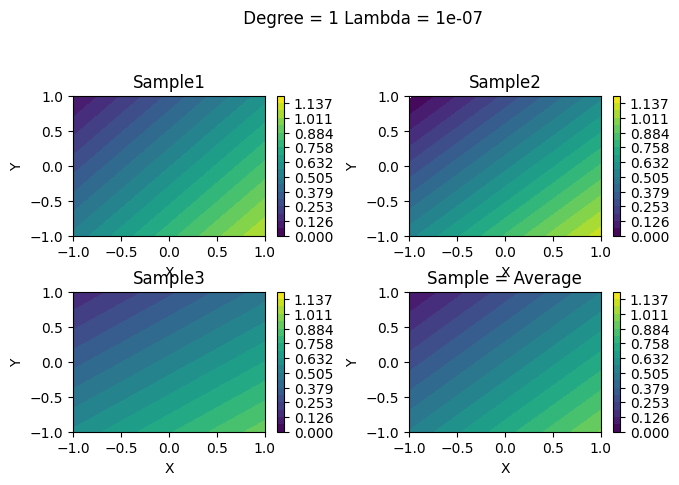

Degree= 1 lambda= 1e-07
Bias = 0.00016411740552080024
Variance = 0.003772010557507761
MSE = 0.003936127963028562


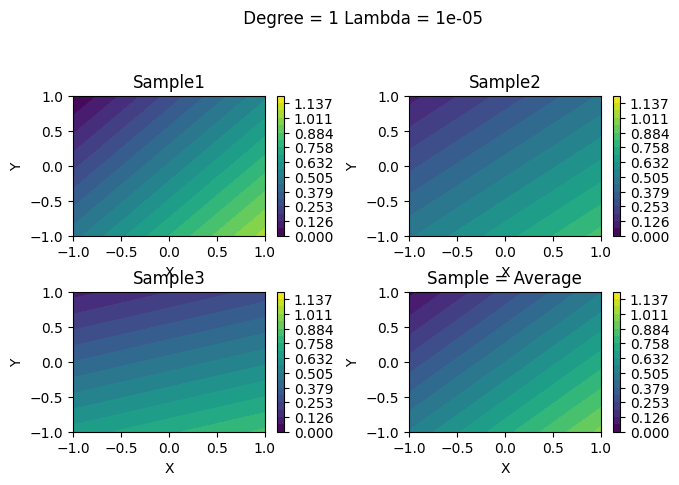

Degree= 1 lambda= 1e-05
Bias = 0.0002197385137331675
Variance = 0.0032878044781335736
MSE = 0.0035075429918667413


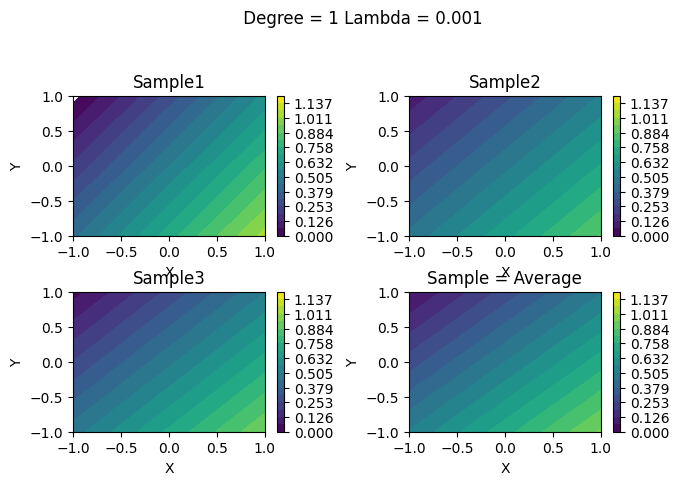

Degree= 1 lambda= 0.001
Bias = 0.00016098172449139747
Variance = 0.0034377454862789657
MSE = 0.0035987272107703633


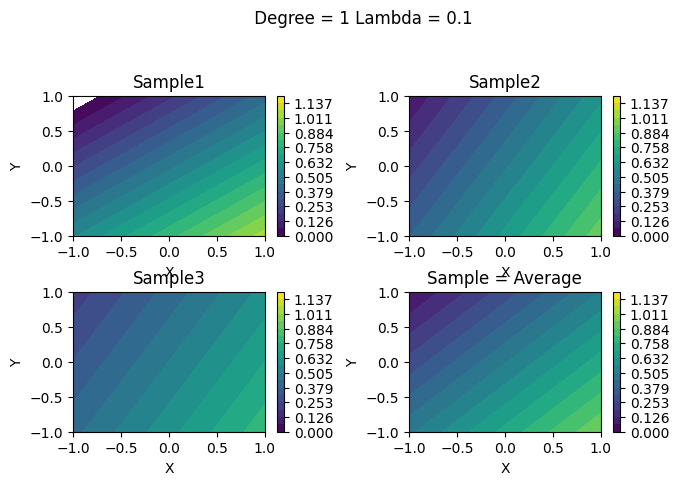

Degree= 1 lambda= 0.1
Bias = 5.087130601508134e-05
Variance = 0.00376844240768214
MSE = 0.0038193137136972215


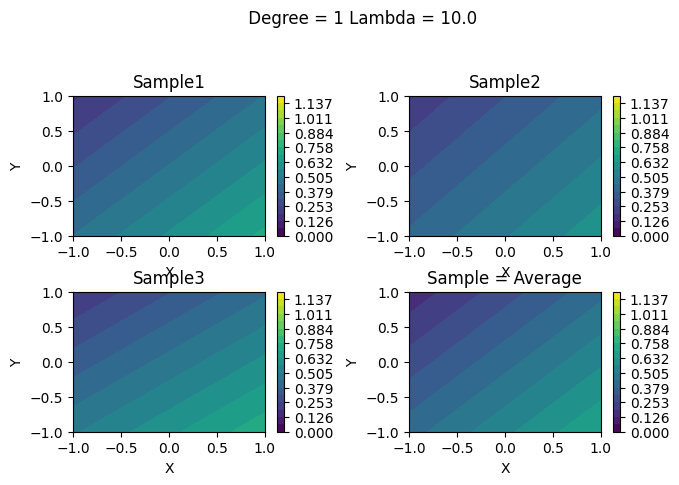

Degree= 1 lambda= 10.0
Bias = 0.009938943112640767
Variance = 0.0020439448138612
MSE = 0.011982887926501967


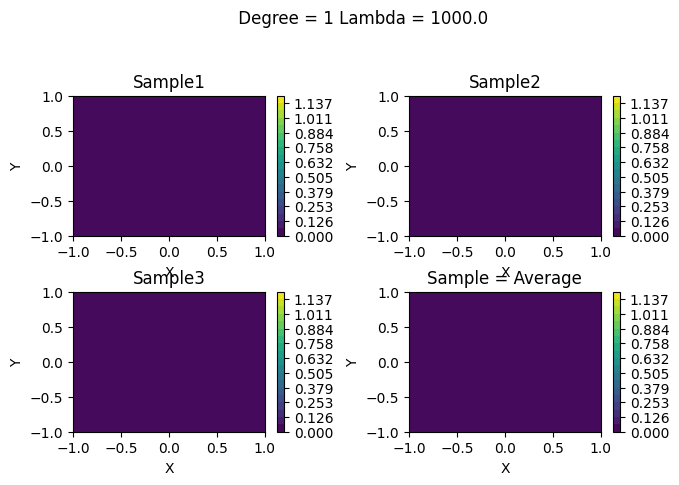

Degree= 1 lambda= 1000.0
Bias = 0.199531079007721
Variance = 6.7812218546454605e-06
MSE = 0.19953786022957565


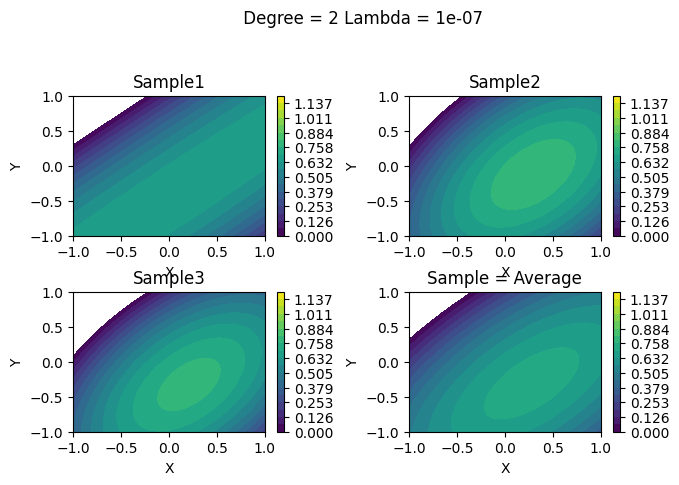

Degree= 2 lambda= 1e-07
Bias = 0.00024820165391303215
Variance = 0.00505126498563901
MSE = 0.0052994666395520425


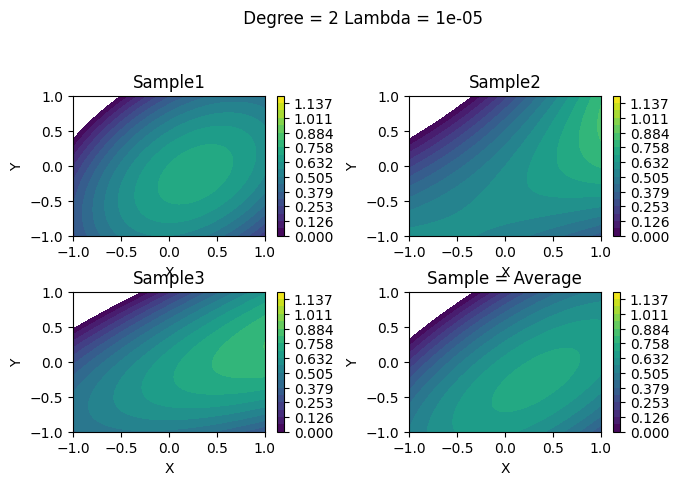

Degree= 2 lambda= 1e-05
Bias = 0.00032778030418377627
Variance = 0.005405084077007992
MSE = 0.005732864381191768


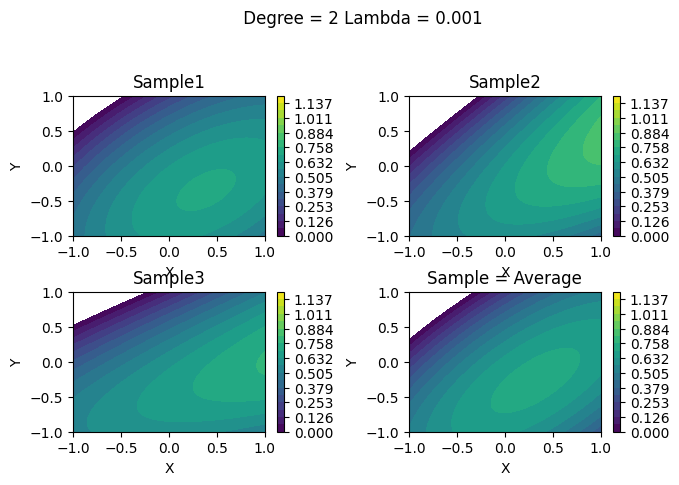

Degree= 2 lambda= 0.001
Bias = 0.00035265216440394007
Variance = 0.005726537558968759
MSE = 0.006079189723372699


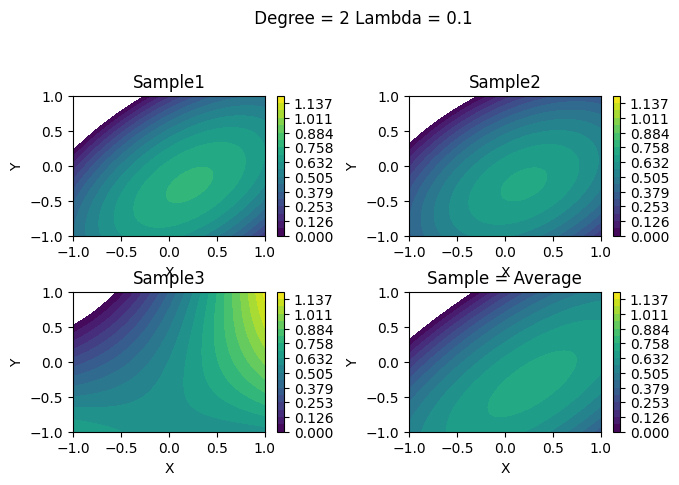

Degree= 2 lambda= 0.1
Bias = 0.00042792728383906844
Variance = 0.005998023840410805
MSE = 0.0064259511242498735


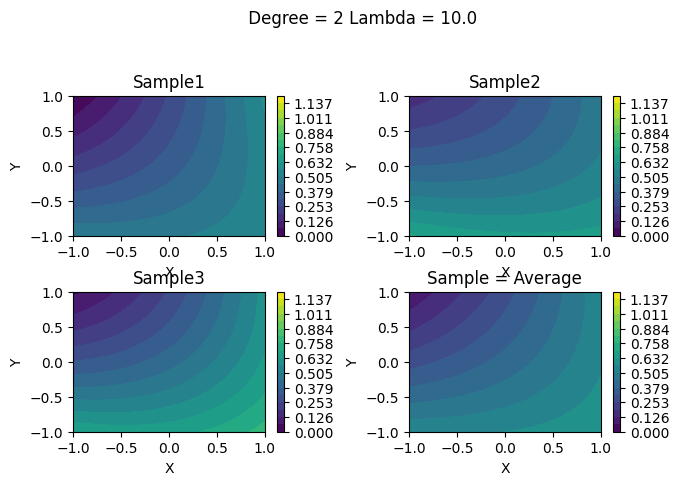

Degree= 2 lambda= 10.0
Bias = 0.026591403056755315
Variance = 0.0018110614787834461
MSE = 0.02840246453553876


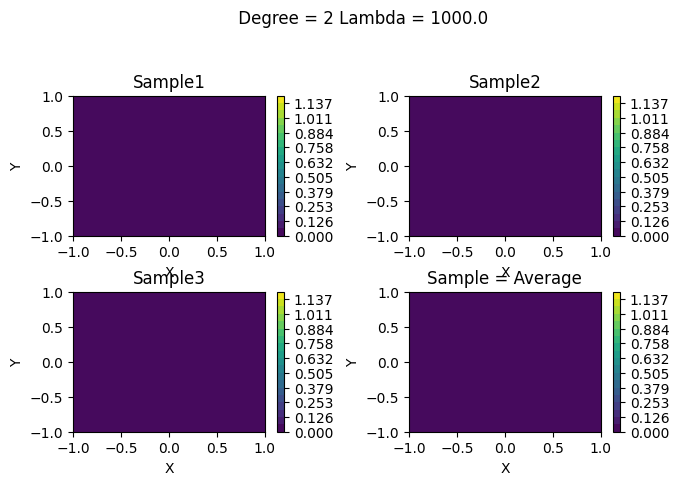

Degree= 2 lambda= 1000.0
Bias = 0.19682173424822166
Variance = 8.575356130710386e-06
MSE = 0.19683030960435238


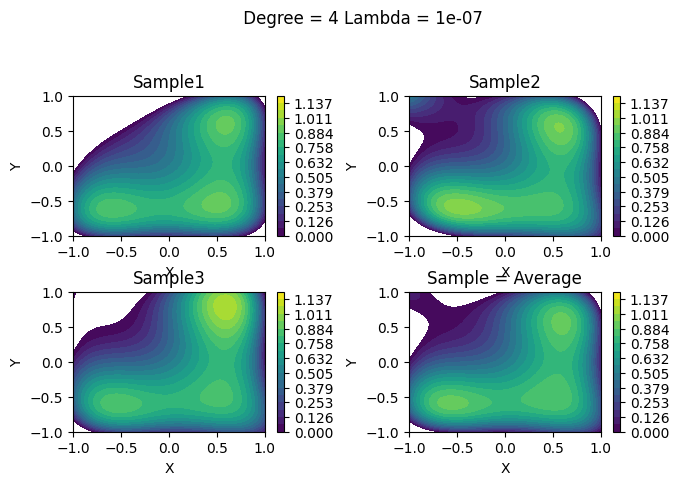

Degree= 4 lambda= 1e-07
Bias = 0.0016531644263751235
Variance = 0.011099139954231101
MSE = 0.012752304380606224


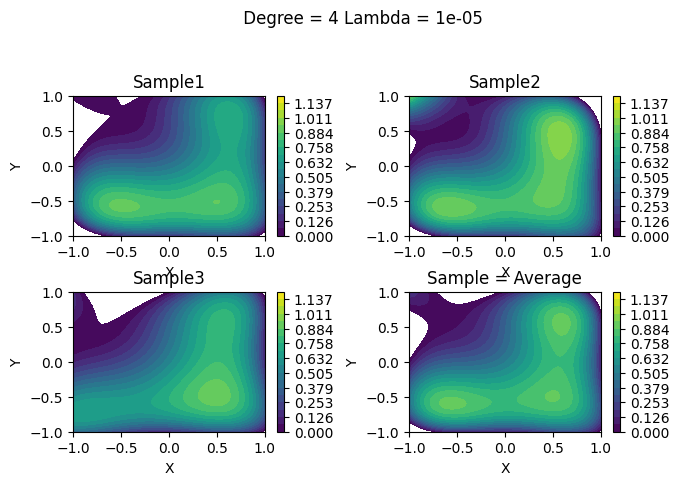

Degree= 4 lambda= 1e-05
Bias = 0.001246441098169024
Variance = 0.007222592980110076
MSE = 0.0084690340782791


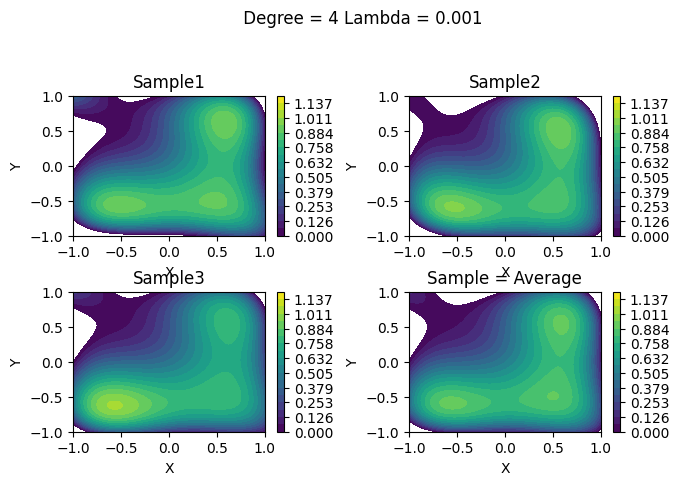

Degree= 4 lambda= 0.001
Bias = 0.0017173254512057828
Variance = 0.008317146540239226
MSE = 0.010034471991445009


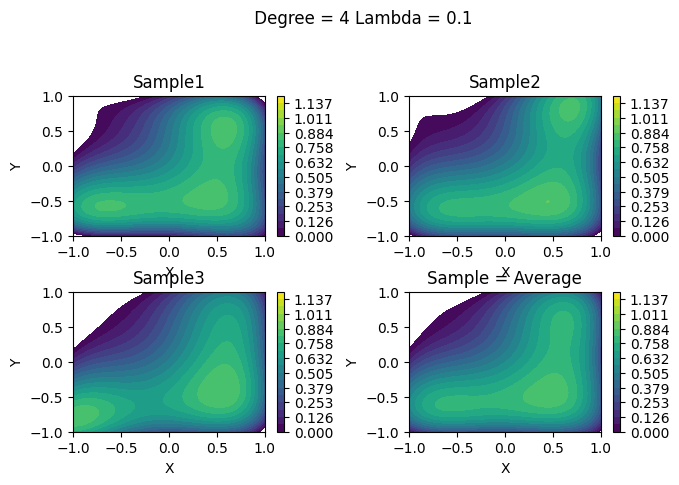

Degree= 4 lambda= 0.1
Bias = 0.0025297193174735827
Variance = 0.004039748255580149
MSE = 0.006569467573053732


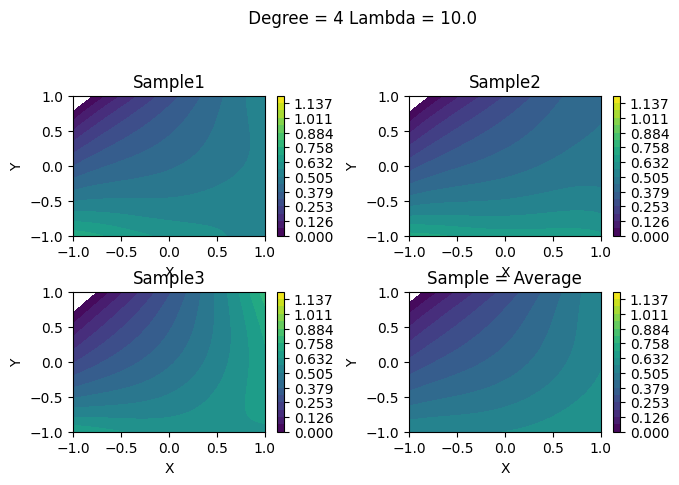

Degree= 4 lambda= 10.0
Bias = 0.04615585633735581
Variance = 0.0026283166732866
MSE = 0.04878417301064241


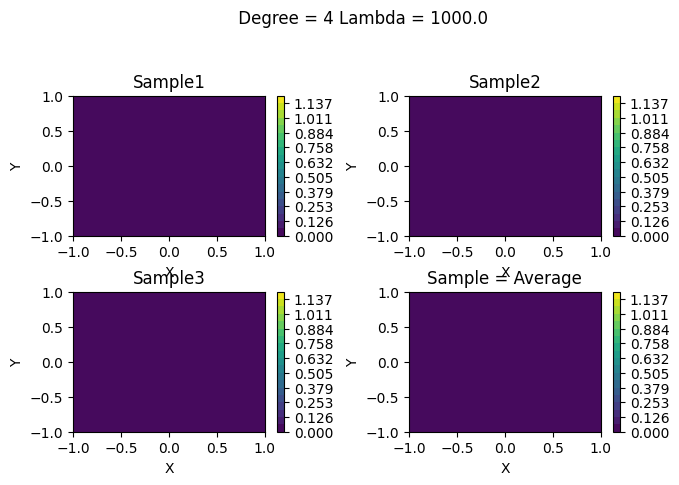

Degree= 4 lambda= 1000.0
Bias = 0.19650844226061104
Variance = 9.765075303926029e-06
MSE = 0.19651820733591496


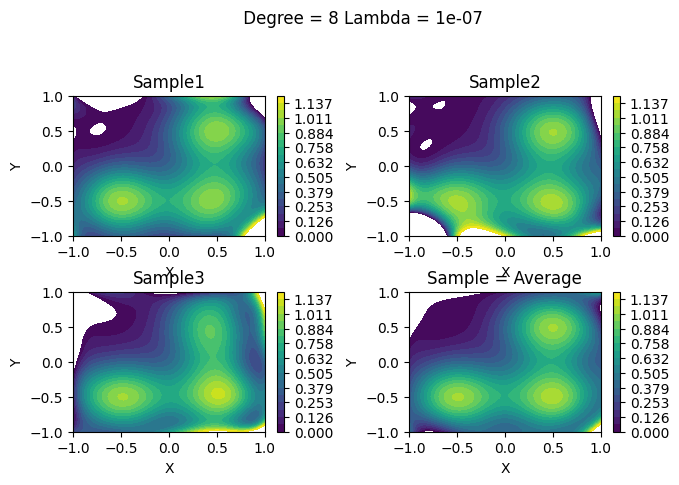

Degree= 8 lambda= 1e-07
Bias = 0.011301426075871092
Variance = 0.20458170991130203
MSE = 0.21588313598717312


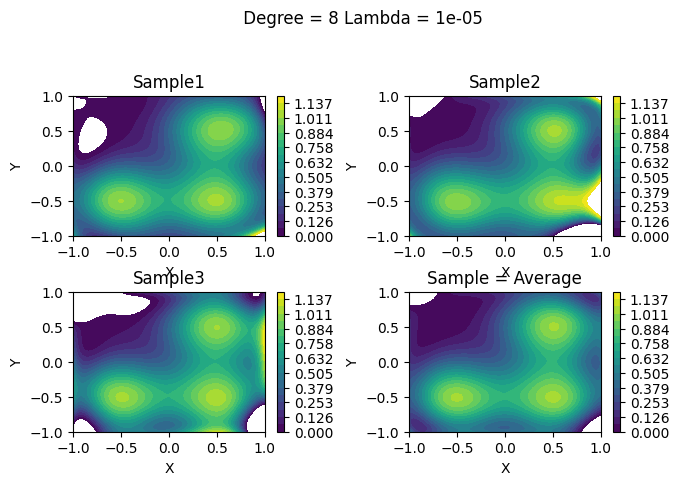

Degree= 8 lambda= 1e-05
Bias = 0.003494814684339884
Variance = 0.05343262506552546
MSE = 0.05692743974986534


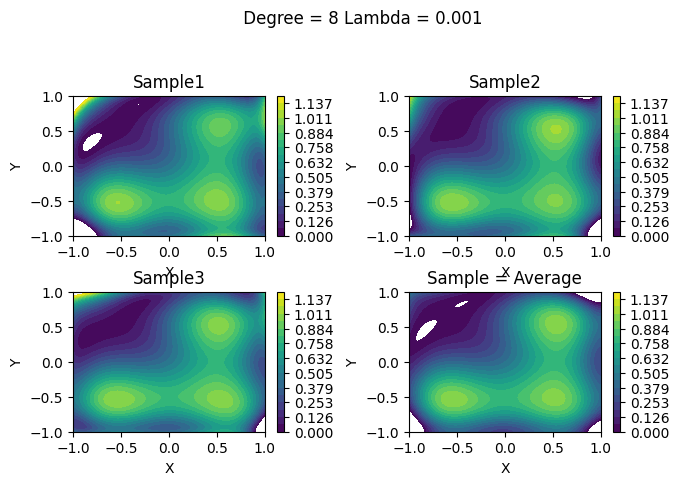

Degree= 8 lambda= 0.001
Bias = 0.007695284781904149
Variance = 0.02403330382967408
MSE = 0.03172858861157823


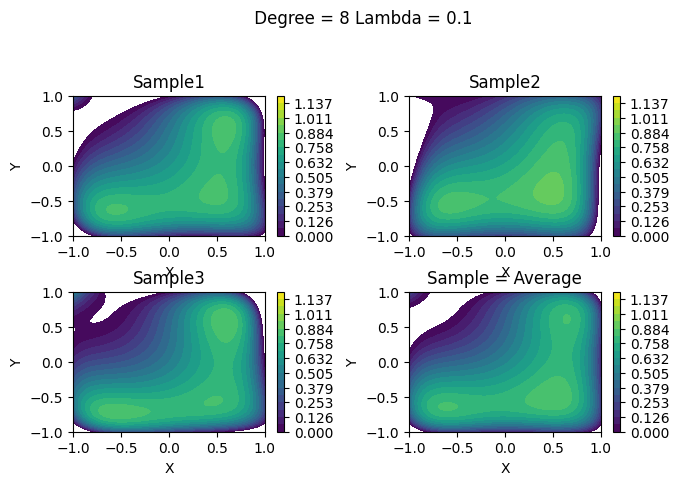

Degree= 8 lambda= 0.1
Bias = 0.00835201608587881
Variance = 0.00769881382346723
MSE = 0.01605082990934604


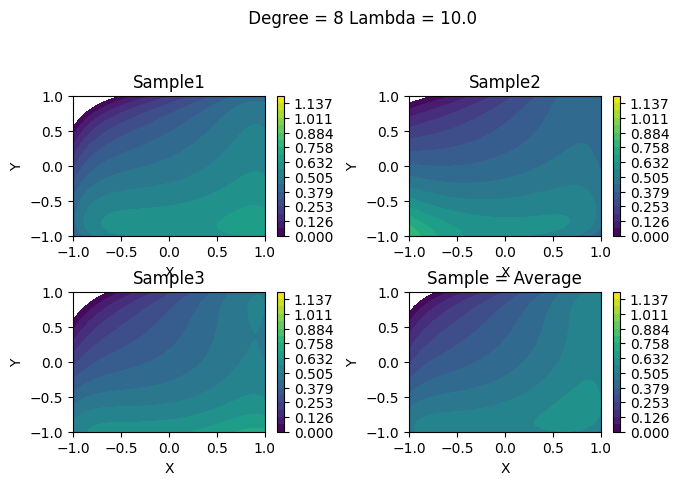

Degree= 8 lambda= 10.0
Bias = 0.04283541846372308
Variance = 0.0027135746363166125
MSE = 0.045548993100039695


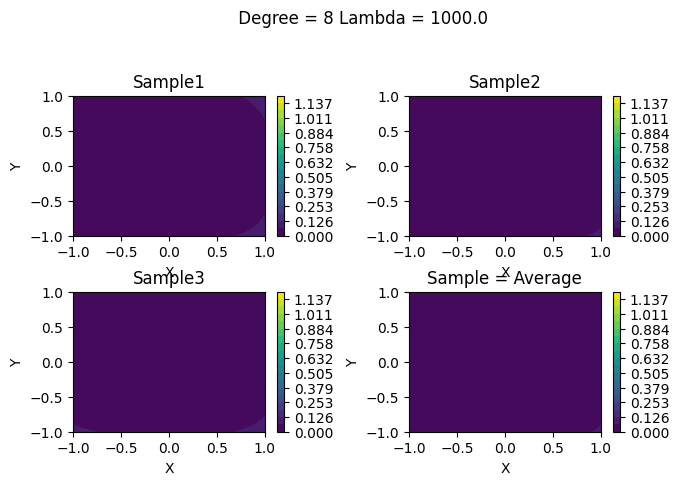

Degree= 8 lambda= 1000.0
Bias = 0.19726127720427383
Variance = 1.5543366425075117e-05
MSE = 0.1972768205706989


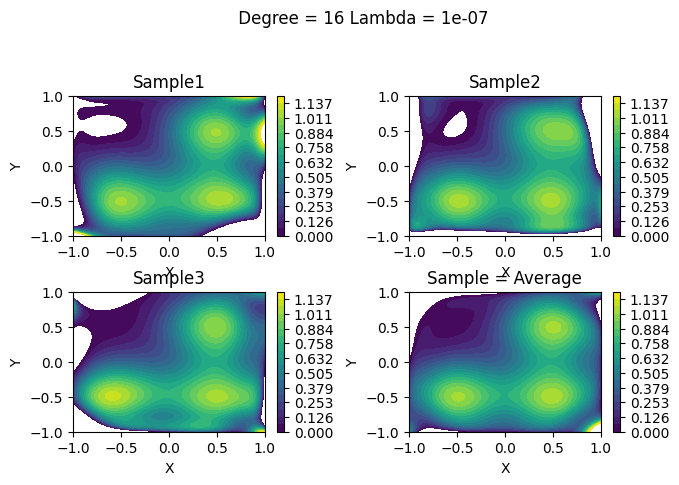

Degree= 16 lambda= 1e-07
Bias = 0.026280601988036664
Variance = 0.40629374739302365
MSE = 0.4325743493810603


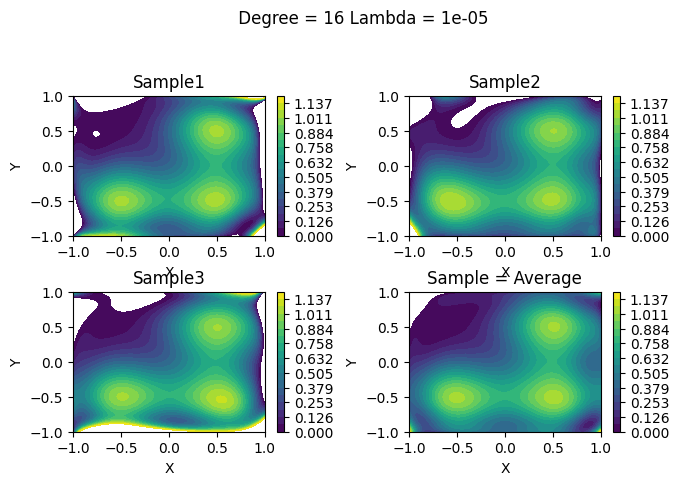

Degree= 16 lambda= 1e-05
Bias = 0.010662697193245115
Variance = 0.17425624387740377
MSE = 0.18491894107064888


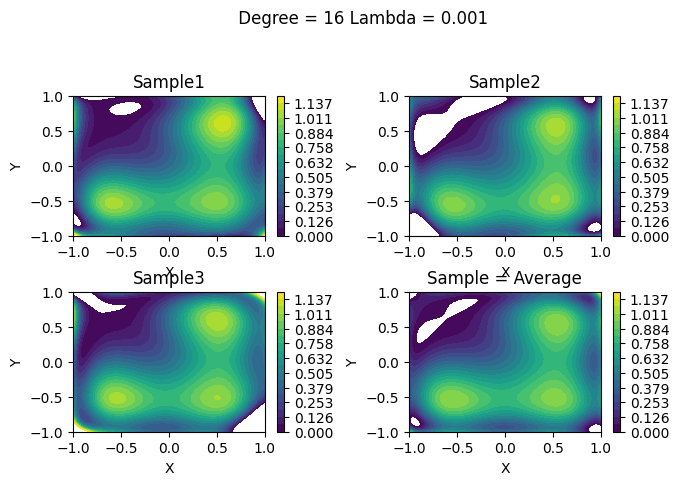

Degree= 16 lambda= 0.001
Bias = 0.006083651841131524
Variance = 0.04941375180623764
MSE = 0.05549740364736916


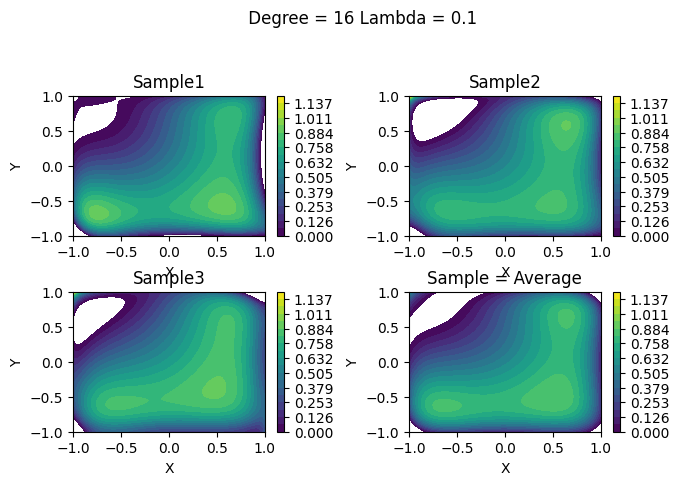

Degree= 16 lambda= 0.1
Bias = 0.009962754032859043
Variance = 0.012819339145404375
MSE = 0.022782093178263418


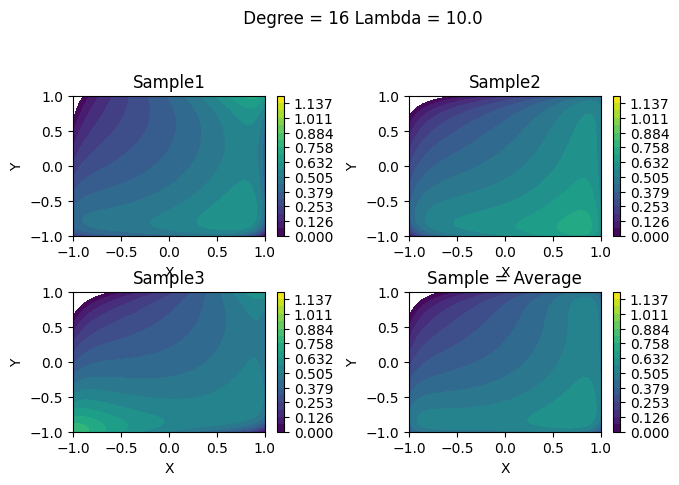

Degree= 16 lambda= 10.0
Bias = 0.04229824479515
Variance = 0.0028577309300463153
MSE = 0.045155975725196314


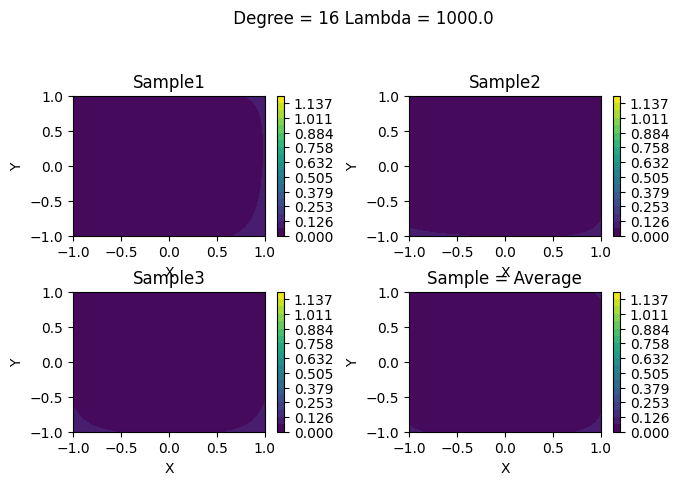

Degree= 16 lambda= 1000.0
Bias = 0.19961563210365293
Variance = 1.745148549459626e-05
MSE = 0.19963308358914753


In [8]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    n=X_test.shape[0]
    Y_test_pred=np.zeros(X_test.shape[0])
    phi=np.ones((n,1))
    for i in range(1,degree+1):
        for j in range(i+1):
            phi=np.concatenate((phi,np.power(X_test[:,0],i-j).reshape((n,1))*np.power(X_test[:,1],j).reshape(n,1)),axis=1)
    Y_test_pred=np.dot(phi,wt_vector.reshape((phi.shape[1],1)))
    return Y_test_pred

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    Z = polynomial_regression_ridge_pred(np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1), wt_vector, degree)
    Z = Z.reshape(100,100)
    
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    n=X_train.shape[0]
    phi=np.ones((n,1))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            phi=np.concatenate((phi,np.power(X_train[:,0],i-j).reshape((n,1))*np.power(X_train[:,1],j).reshape((n,1))),axis=1)
    w=np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T,phi)+reg_param*np.identity(phi.shape[1])),phi.T),Y_train)
    return w.reshape((phi.shape[1]))
    
    

    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

    # Fill code here
    bias=0
    variance=0
    mean_squared_error=0
    w_mean=np.zeros(int((degree+1)*(degree+2)/2))
    w_all=np.zeros((100,int((degree+1)*(degree+2)/2)))
    for i in range(100):
        X_train=np.random.uniform(-1,1,(num_training_samples,2))
        Y_train1=np.exp(-4*((X_train[:,0].reshape((num_training_samples,1))-0.5*np.ones((num_training_samples,1)))**2+(X_train[:,1].reshape((num_training_samples,1))-0.5*np.ones((num_training_samples,1)))**2))
        Y_train2=np.exp(-4*((X_train[:,0].reshape((num_training_samples,1))+0.5*np.ones((num_training_samples,1)))**2+(X_train[:,1].reshape((num_training_samples,1))+0.5*np.ones((num_training_samples,1)))**2))
        Y_train3=np.exp(-4*((X_train[:,0].reshape((num_training_samples,1))-0.5*np.ones((num_training_samples,1)))**2+(X_train[:,1].reshape((num_training_samples,1))+0.5*np.ones((num_training_samples,1)))**2))
        Y_train=Y_train1+Y_train2+Y_train3
        w=polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        w_all[i,:]=w
        if i<3:
            plt.subplot(2,2,i+1)
            visualise_polynomial_2d(w, degree, title="Sample" + str(i+1))
        w_mean=w_mean+w
    w_mean=w_mean/100
    plt.subplot(2,2,4)
    visualise_polynomial_2d(w_mean, degree, title="Sample = Average")
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.0,
                    top=0.8,
                    wspace=0.4,
                    hspace=0.4)
    plt.suptitle("             Degree = " + str(degree) + " Lambda = " + str(reg_param))
    plt.show()
    #w_mean used for Y_mean (g(x))
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X_test=np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1)
    Y_mean = polynomial_regression_ridge_pred(X_test, w_mean, degree)
    Y_star = np.zeros((10000,1))
    Y1=np.exp(-4*((X_test[:,0].reshape((10000,1))-0.5*np.ones((10000,1)))**2+(X_test[:,1].reshape((10000,1))-0.5*np.ones((10000,1)))**2))
    Y2=np.exp(-4*((X_test[:,0].reshape((10000,1))+0.5*np.ones((10000,1)))**2+(X_test[:,1].reshape((10000,1))+0.5*np.ones((10000,1)))**2))
    Y3=np.exp(-4*((X_test[:,0].reshape((10000,1))-0.5*np.ones((10000,1)))**2+(X_test[:,1].reshape((10000,1))+0.5*np.ones((10000,1)))**2))
    Y_star=Y1+Y2+Y3
    w = polynomial_regression_ridge_train(X_test,Y_star,degree,reg_param)
    Y_test = polynomial_regression_ridge_pred(X_test, w, degree)
    bias=np.mean((Y_mean-Y_test)**2)
    for i in range(100):
        Y_test = polynomial_regression_ridge_pred(X_test, w_all[i,:], degree)
        variance=variance+np.mean((Y_mean-Y_test)**2)
    variance=variance/100
    mean_squared_error=bias+variance
    return bias, variance, mean_squared_error
    
    
    
for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))




In [9]:
# Cell type: convenience



Bias Matrix:

|Degree/Lambda|1e-07|1e-05|1e-03|0.1|10|1000|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1|0.000164|0.000219|0.000160|5.087e-05|0.009938|0.199531|
|2|0.000248|0.000327|0.000352|0.000427|0.026591|0.196822|
|4|0.001653|0.001246|0.001717|0.002530|0.046155|0.196508|
|8|0.011301|0.003495|0.007695|0.008352|0.042835|0.197261|
|16|0.026280|0.010662|0.006083|0.009962|0.042298|0.199615|

Variance Matrix:

|Degree/Lambda|1e-07|1e-05|1e-03|0.1|10|1000|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1|0.003772|0.003287|0.003438|0.003768|0.002044|6.781e-06|
|2|0.005051|0.005405|0.005726|0.005998|0.001811|8.575e-06|
|4|0.011099|0.007222|0.008317|0.004040|0.002628|9.765e-06|
|8|0.204582|0.053433|0.024033|0.007698|0.002714|1.554e-05|
|16|0.406294|0.174256|0.049413|0.012819|0.002858|1.745e-05|

Observations:
1. On increasing lambda, Variance reduces and Bias increases.
2. On increasing degree from 1 to 16, the plots show concentraion at a,b,c more clearly.
3. At high lambda values, variance is very low and bias is very high. This is because of underfitting. Also degree changes at high lambda cause very little change in variance and bias.
4. At low lambda values, variance is very high and bias is very low. This is because of overfitting.

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




Number of training samples = 50
For element i,j Degree = 2^i and lambda = 10^(j*2-7)
Training MSE
Degree\lambda      1e-07      1e-05      1e-03      1e-01      1e+01      1e+03 
       1           0.3407     0.3407     0.3407     0.3402     0.3152     0.3050 
       2           0.4570     0.4570     0.4569     0.4505     0.3312     0.3048 
       4           0.4891     0.4891     0.4888     0.4738     0.3440     0.3048 
       8           0.5896     0.5665     0.5385     0.4846     0.3544     0.3049 
      16           0.5909     0.5820     0.5459     0.4949     0.3646     0.3050 
Test MSE
Degree\lambda      1e-07      1e-05      1e-03      1e-01      1e+01      1e+03 
       1           0.3028     0.3028     0.3028     0.3024     0.2794     0.2651 
       2           0.4307     0.4307     0.4307     0.4218     0.2872     0.2651 
       4           0.4509     0.4509     0.4510     0.4537     0.2981     0.2651 
       8         170.1181    18.6094     1.1820     0.4450     0.3098     0

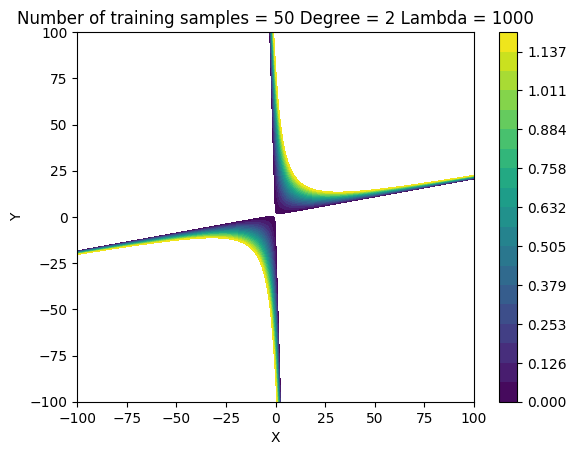

Number of training samples = 100
For element i,j Degree = 2^i and lambda = 10^(j*2-7)
Training MSE
Degree\lambda      1e-07      1e-05      1e-03      1e-01      1e+01      1e+03 
       1           0.2836     0.2836     0.2836     0.2835     0.2786     0.2741 
       2           0.4107     0.4107     0.4107     0.4080     0.3116     0.2742 
       4           0.4286     0.4286     0.4285     0.4214     0.3278     0.2744 
       8           0.5000     0.4975     0.4681     0.4318     0.3377     0.2746 
      16           0.5397     0.5242     0.4820     0.4388     0.3430     0.2749 
Test MSE
Degree\lambda      1e-07      1e-05      1e-03      1e-01      1e+01      1e+03 
       1           0.2739     0.2739     0.2739     0.2738     0.2692     0.2650 
       2           0.3957     0.3957     0.3956     0.3929     0.2977     0.2651 
       4           0.4258     0.4258     0.4257     0.4200     0.3151     0.2653 
       8           1.0341     0.9107     0.5037     0.4431     0.3313     

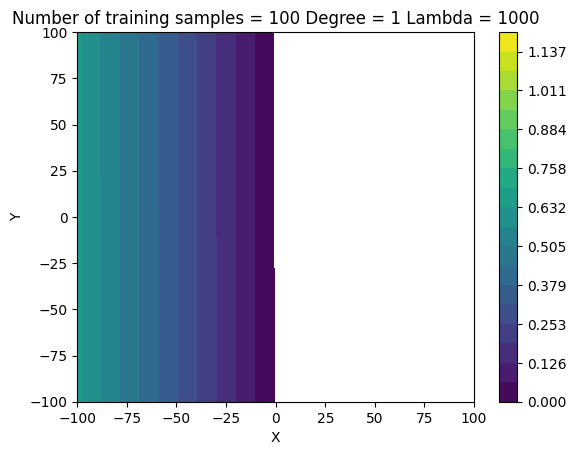

Number of training samples = 200
For element i,j Degree = 2^i and lambda = 10^(j*2-7)
Training MSE
Degree\lambda      1e-07      1e-05      1e-03      1e-01      1e+01      1e+03 
       1           0.2577     0.2577     0.2577     0.2577     0.2565     0.2584 
       2           0.3706     0.3706     0.3706     0.3694     0.3058     0.2585 
       4           0.3909     0.3909     0.3909     0.3851     0.3189     0.2587 
       8           0.4425     0.4423     0.4301     0.3930     0.3219     0.2591 
      16           0.5015     0.4786     0.4399     0.4038     0.3241     0.2595 
Test MSE
Degree\lambda      1e-07      1e-05      1e-03      1e-01      1e+01      1e+03 
       1           0.2683     0.2683     0.2683     0.2683     0.2668     0.2640 
       2           0.3845     0.3845     0.3845     0.3832     0.3161     0.2641 
       4           0.4217     0.4217     0.4216     0.4134     0.3285     0.2643 
       8           0.4616     0.4613     0.4422     0.4151     0.3332     

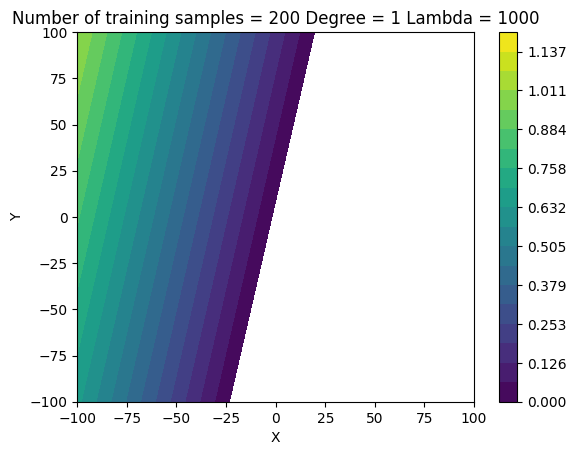

Number of training samples = 1000
For element i,j Degree = 2^i and lambda = 10^(j*2-7)
Training MSE
Degree\lambda      1e-07      1e-05      1e-03      1e-01      1e+01      1e+03 
       1           0.2415     0.2415     0.2415     0.2415     0.2414     0.2416 
       2           0.3434     0.3434     0.3434     0.3431     0.3254     0.2428 
       4           0.3572     0.3572     0.3572     0.3563     0.3283     0.2442 
       8           0.4054     0.4054     0.4028     0.3731     0.3302     0.2462 
      16           0.4801     0.4665     0.4257     0.3818     0.3334     0.2478 
Test MSE
Degree\lambda      1e-07      1e-05      1e-03      1e-01      1e+01      1e+03 
       1           0.2626     0.2626     0.2626     0.2626     0.2626     0.2635 
       2           0.3702     0.3702     0.3702     0.3700     0.3513     0.2648 
       4           0.3808     0.3808     0.3808     0.3799     0.3541     0.2664 
       8           0.4313     0.4313     0.4279     0.3985     0.3558    

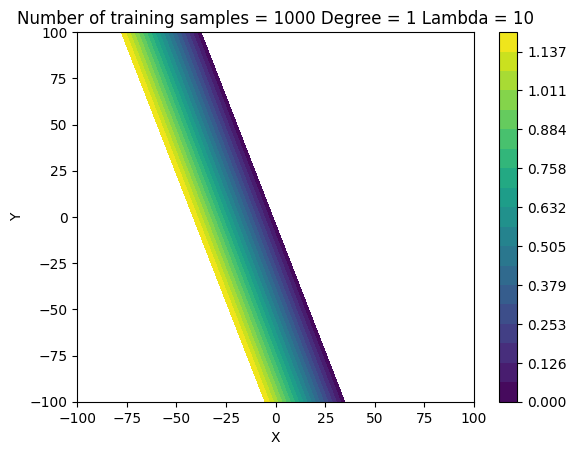

In [10]:
# Cell type : CodeWrite 
datap4=np.load("Data/dataset4_1.npz")
X_train=datap4["arr_0"]
Y_train=datap4["arr_1"]
X_test=datap4["arr_2"]
Y_test=datap4["arr_3"]

for num in [50,100,200,1000]:
    ans_train=np.zeros((5,6))
    ans_test=np.zeros((5,6))
    w_1=np.zeros((6,int((1+1)*(1+2)/2)))
    w_2=np.zeros((6,int((2+1)*(2+2)/2)))
    w_4=np.zeros((6,int((4+1)*(4+2)/2)))
    w_8=np.zeros((6,int((8+1)*(8+2)/2)))
    w_16=np.zeros((6,int((16+1)*(16+2)/2)))
    for deg in [1,2,4,8,16]:
        for reg in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
            w=polynomial_regression_ridge_train(X_train[:num,:], Y_train[:num], deg, reg)
            #print(w.shape)
            Y_train_pred=polynomial_regression_ridge_pred(X_train[:num,:], w, deg)
            Y_test_pred=polynomial_regression_ridge_pred(X_test, w, deg)
            i=int(np.log2(deg))
            j=int((np.log10(reg)+7)/2)
            if(deg==1):
                w_1[j]=w
            elif(deg==2):
                w_2[j]=w
            elif(deg==4):
                w_4[j]=w
            elif(deg==8):
                w_8[j]=w
            else:
                w_16[j]=w
            #print(i+1,j+1)
            ans_train[i,j]=np.mean((Y_train_pred-Y_train[:num])**2)
            ans_test[i,j]=np.mean((Y_test_pred-Y_test)**2)
    print('================================')
    print('Number of training samples = '+str(num))
    print("For element i,j Degree = 2^i and lambda = 10^(j*2-7)")
    degrees=[1,2,4,8,16]
    reg_params=[1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
    #print ans_train in a table
    print('Training MSE')
    print('Degree\lambda', end=' ')
    for reg in reg_params:
        print('%10.0e' % reg, end=' ')
    print()
    for i in range(5):
        print('%8d' % degrees[i], end='       ')
        for j in range(6):
            print('%10.4f' % ans_train[i,j], end=' ')
        print()
    #print ans_test in a table
    print('Test MSE')
    print('Degree\lambda', end=' ')
    for reg in reg_params:
        print('%10.0e' % reg, end=' ')
    print()
    for i in range(5):
        print('%8d' % degrees[i], end='       ')
        for j in range(6):
            print('%10.4f' % ans_test[i,j], end=' ')
        print()
    
    
    print("Best model for test error")
    mdeg,mreg = np.unravel_index(np.argmin(ans_test),ans_test.shape)
    mdegv = 2**mdeg
    mregv = 10**(mreg*2-7)
    print("Degree = "+str(mdegv)+" Lambda = "+str(mregv)+" Test MSE = "+str(ans_test[mdeg,mreg]))
    if(mdegv==1):
        tempw=w_1[mreg]
    elif(mdegv==2):
        tempw=w_2[mreg]
    elif(mdegv==4):
        tempw=w_4[mreg]
    elif(mdegv==8):
        tempw=w_8[mreg]
    else:
        tempw=w_16[mreg]
    
    plt.plot()
    X,Y=np.meshgrid(np.linspace(-100,100,200),np.linspace(-100,100,200))
    Z = polynomial_regression_ridge_pred(np.concatenate((X.reshape(40000,1),Y.reshape(40000,1)),axis=1), tempw, mdegv)
    Z = Z.reshape(200,200)
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("Number of training samples = "+str(num)+" Degree = "+str(mdegv)+" Lambda = "+str(mregv))
    plt.colorbar()
    plt.show()
            


On increasing the number of training samples, the test error seems to reduce in all algorithms on average.

50 Training samples Test MSE:
|Degree\lambda  |    1e-07    |  1e-05    |  1e-03  |    1e-01   |   1e+01    |  1e+03  |
|:-------------:|:-----------:|:---------:|:-------:|:----------:|:----------:|:-------:|
|       1      |     0.3028 |    0.3028   |  0.3028  |   0.3024  |   0.2794   |  0.2651 |
|       2       |    0.4307 |    0.4307   |  0.4307  |   0.4218  |   0.2872   |  0.2651 |
|       4       |    0.4509 |    0.4509   |  0.4510  |   0.4537  |   0.2981   |  0.2651 |
|       8       |  170.1181 |   18.6094   |  1.1820  |   0.4450  |   0.3098   |  0.2652 |
|      16       |  229.9336 |   66.8180   |  2.6499  |   0.4703  |   0.3207   |  0.2652|

100 Training samples Test MSE:
|Degree\lambda   |   1e-07   |   1e-05   |   1e-03   |   1e-01    |  1e+01    |  1e+03 |
|:--------------:|:----------:|:---------:|:---------:|:--------:|:----------:|:------:|
|       1        |   0.2739  |   0.2739  |   0.2739  |   0.2738   |  0.2692   |  0.2650| 
|       2        |   0.3957  |   0.3957  |   0.3956  |   0.3929   |  0.2977   |  0.2651| 
|       4        |   0.4258  |   0.4258  |   0.4257  |   0.4200   |  0.3151   |  0.2653| 
|       8        |   1.0341  |   0.9107  |   0.5037  |   0.4431   |  0.3313   |  0.2655| 
|      16        |  12.2062  |  23.9139  |   0.8138  |   0.4578   |  0.3428   |  0.2656| 

200 Training samples Test MSE:
|Degree\lambda   |   1e-07    |  1e-05    |  1e-03    |  1e-01   |   1e+01    |  1e+03 |
|:--------------:|:----------:|:---------:|:---------:|:--------:|:----------:|:------:|
|       1        |   0.2683   |  0.2683   |  0.2683   |  0.2683  |   0.2668   |  0.2640| 
|       2        |   0.3845   |  0.3845   |  0.3845   |  0.3832  |   0.3161   |  0.2641| 
|       4        |   0.4217   |  0.4217   |  0.4216   |  0.4134  |   0.3285   |  0.2643| 
|       8        |   0.4616   |  0.4613   |  0.4422   |  0.4151  |   0.3332   |  0.2646| 
|      16        |   0.6206   |  0.6798   |  0.4530   |  0.4159  |   0.3402   |  0.2649|

1000 Training samples Test MSE:
|Degree\lambda   |   1e-07  |    1e-05   |   1e-03  |    1e-01   |   1e+01   |   1e+03 |
|:--------------:|:----------:|:---------:|:---------:|:--------:|:----------:|:------:|
|       1        |   0.2626 |    0.2626  |   0.2626 |    0.2626  |   0.2626  |   0.2635| 
|       2        |   0.3702 |    0.3702  |   0.3702 |    0.3700  |   0.3513  |   0.2648| 
|       4        |   0.3808 |    0.3808  |   0.3808 |    0.3799  |   0.3541  |   0.2664| 
|       8        |   0.4313 |    0.4313  |   0.4279 |    0.3985  |   0.3558  |   0.2686| 
|      16        |   0.5218 |    0.5114  |   0.4685 |    0.4074  |   0.3593  |   0.2703| 

50 Training samples Train MSE:
|Degree\lambda    |  1e-07    |  1e-05    |  1e-03    |  1e-01   |   1e+01     | 1e+03 |
|:--------------:|:----------:|:---------:|:---------:|:--------:|:----------:|:------:|
|       1         |  0.3407   |  0.3407   |  0.3407   |  0.3402  |   0.3152    | 0.3050| 
|       2         |  0.4570   |  0.4570   |  0.4569   |  0.4505  |   0.3312    | 0.3048| 
|       4         |  0.4891   |  0.4891   |  0.4888   |  0.4738  |   0.3440    | 0.3048| 
|       8         |  0.5896   |  0.5665   |  0.5385   |  0.4846  |   0.3544    | 0.3049| 
|      16         |  0.5909   |  0.5820   |  0.5459   |  0.4949  |   0.3646    | 0.3050|

100 Training samples Train MSE:
|Degree\lambda   |   1e-07    |  1e-05   |   1e-03    |  1e-01    |  1e+01    |  1e+03 |
|:--------------:|:----------:|:---------:|:---------:|:--------:|:----------:|:------:|
|       1        |   0.2836   |  0.2836  |   0.2836   |  0.2835   |  0.2786   |  0.2741| 
|       2        |   0.4107   |  0.4107  |   0.4107   |  0.4080   |  0.3116   |  0.2742| 
|       4        |   0.4286   |  0.4286  |   0.4285   |  0.4214   |  0.3278   |  0.2744| 
|       8        |   0.5000   |  0.4975  |   0.4681   |  0.4318   |  0.3377   |  0.2746| 
|      16        |   0.5397   |  0.5242  |   0.4820   |  0.4388   |  0.3430   |  0.2749|

200 Training samples Train MSE:
|Degree\lambda  |    1e-07   |   1e-05    |  1e-03  |    1e-01   |   1e+01  |    1e+03 |
|:--------------:|:----------:|:---------:|:---------:|:--------:|:----------:|:------:|
|       1       |    0.2577  |   0.2577   |  0.2577 |    0.2577  |   0.2565 |    0.2584| 
|       2       |    0.3706  |   0.3706   |  0.3706 |    0.3694  |   0.3058 |    0.2585| 
|       4       |    0.3909  |   0.3909   |  0.3909 |    0.3851  |   0.3189 |    0.2587| 
|       8       |    0.4425  |   0.4423   |  0.4301 |    0.3930  |   0.3219 |    0.2591| 
|      16       |    0.5015  |   0.4786   |  0.4399 |    0.4038  |   0.3241 |    0.2595|

1000 Training samples Train MSE:
|Degree\lambda  |    1e-07   |   1e-05   |   1e-03    |  1e-01   |   1e+01   |   1e+03 |
|:--------------:|:----------:|:---------:|:---------:|:--------:|:----------:|:------:|
|       1       |    0.2626  |   0.2626  |   0.2626   |  0.2626  |   0.2626  |   0.2635| 
|       2       |    0.3702  |   0.3702  |   0.3702   |  0.3700  |   0.3513  |   0.2648| 
|       4       |    0.3808  |   0.3808  |   0.3808   |  0.3799  |   0.3541  |   0.2664| 
|       8       |    0.4313  |   0.4313  |   0.4279   |  0.3985  |   0.3558  |   0.2686| 
|      16       |    0.5218  |   0.5114  |   0.4685   |  0.4074  |   0.3593  |   0.2703|


** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










All prior contour plots with 4 data points : 


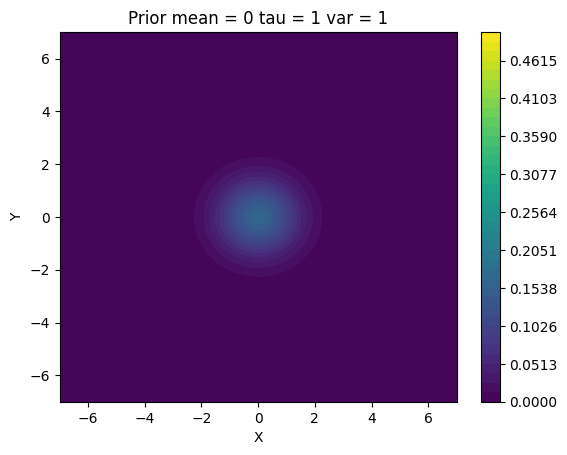

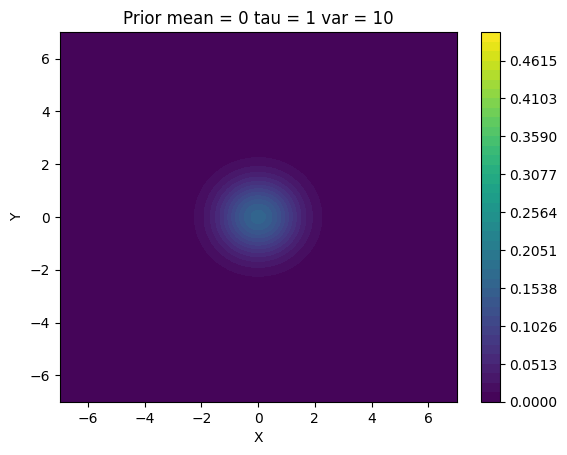

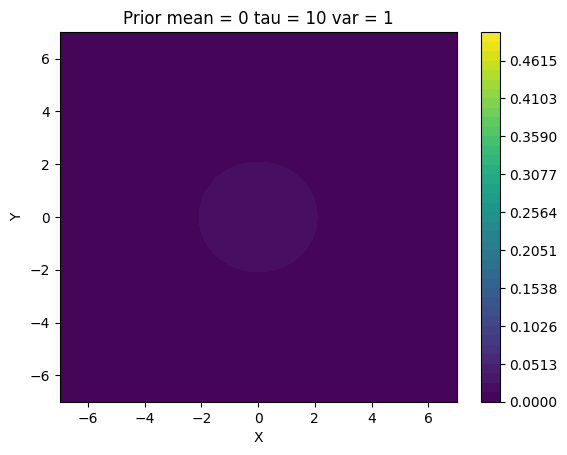

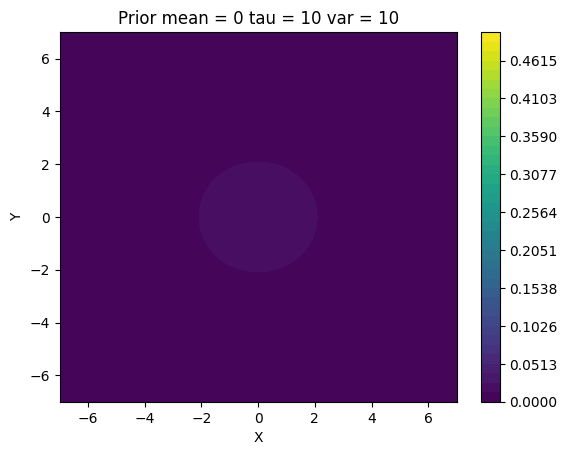

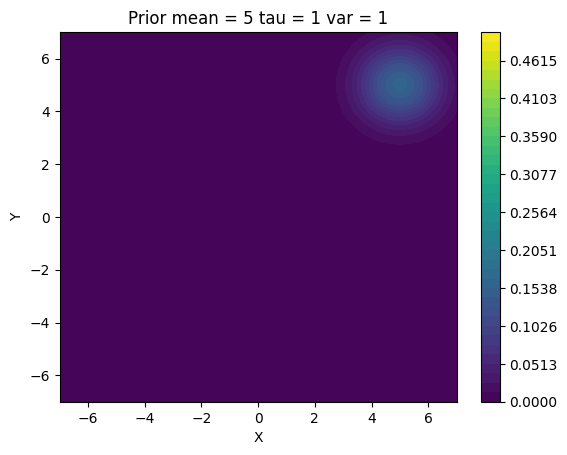

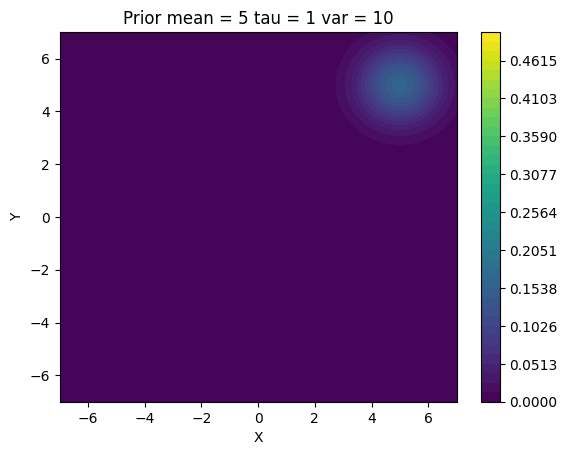

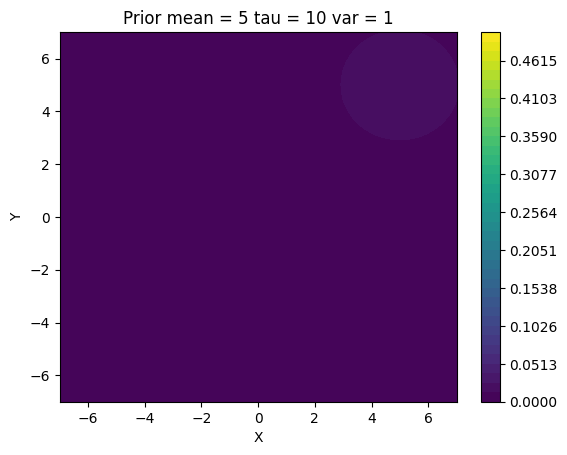

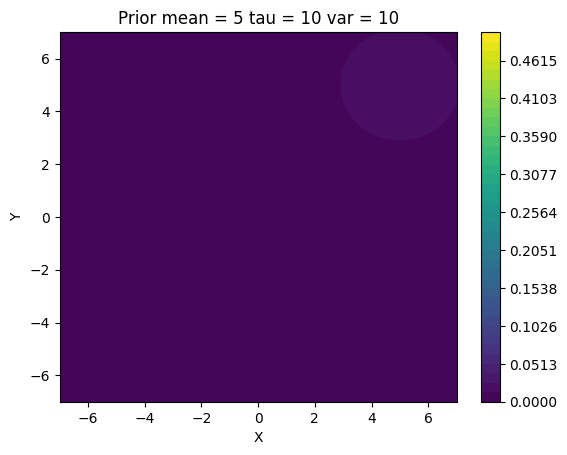

All posterior contour plots with 4 data points : 


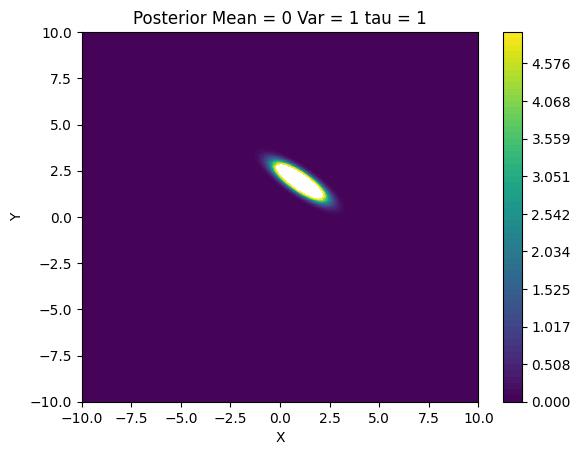

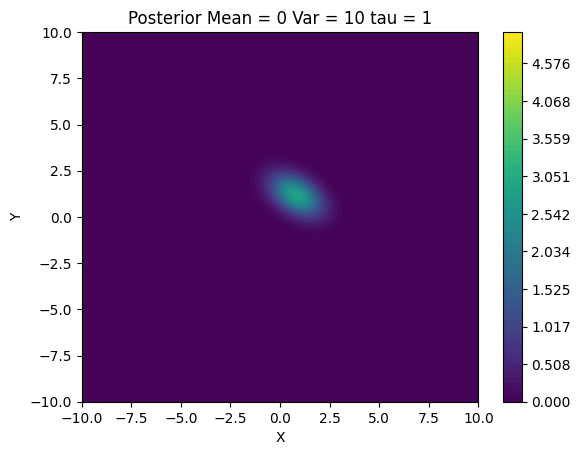

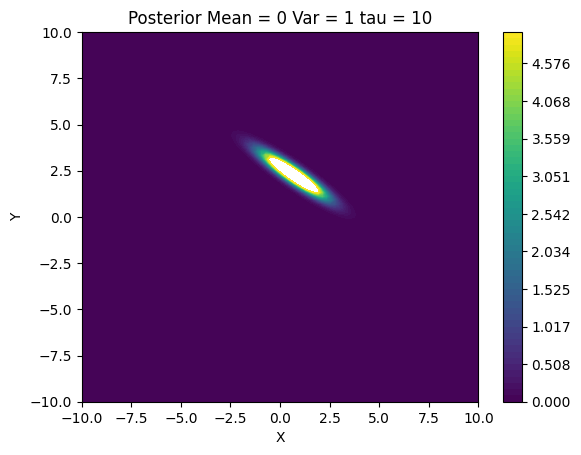

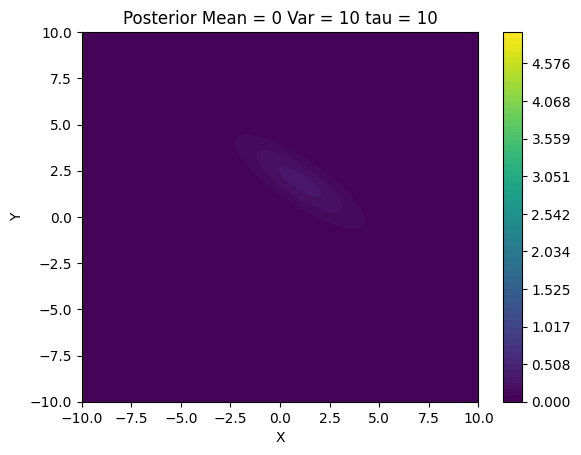

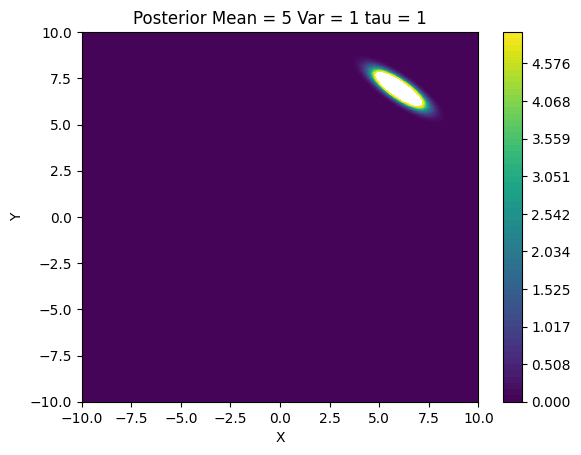

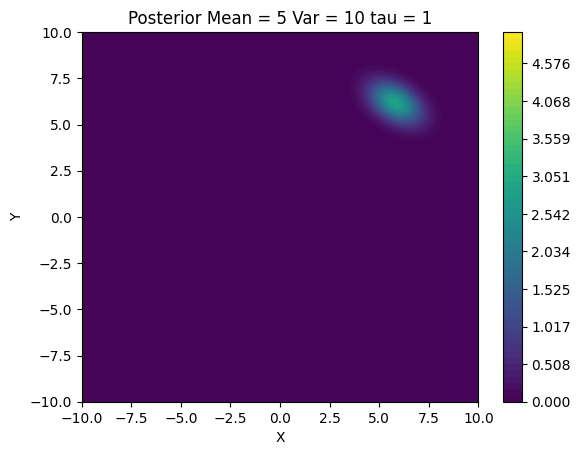

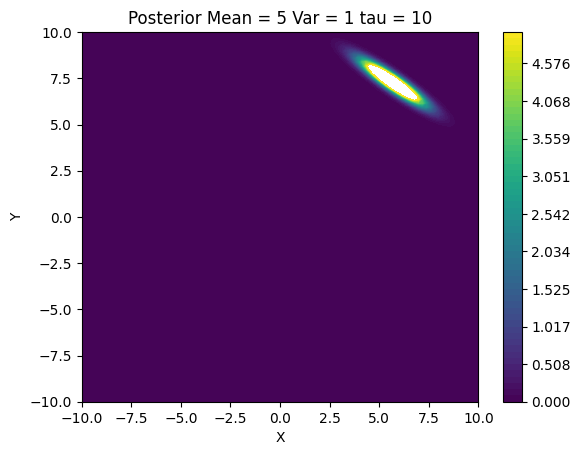

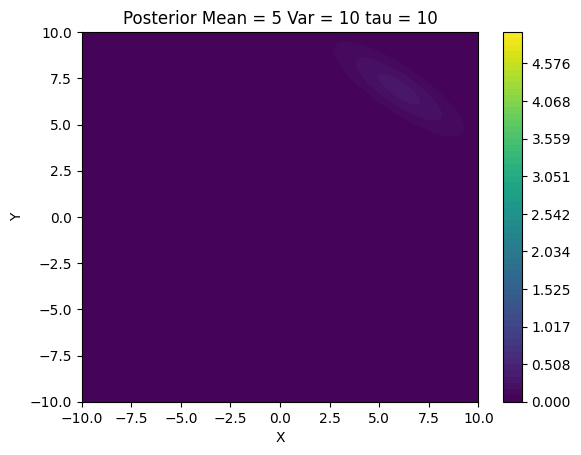

All prior contour plots with 100 data points : 


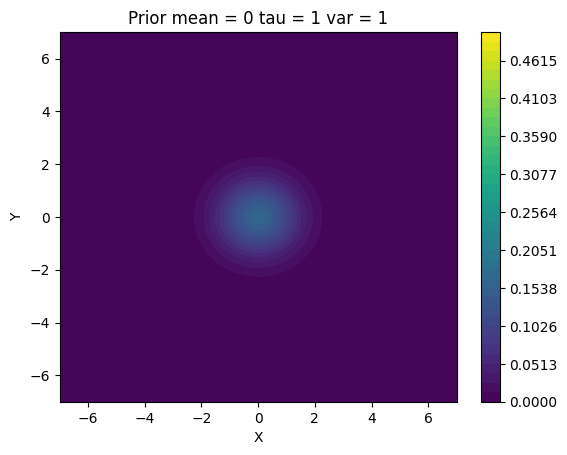

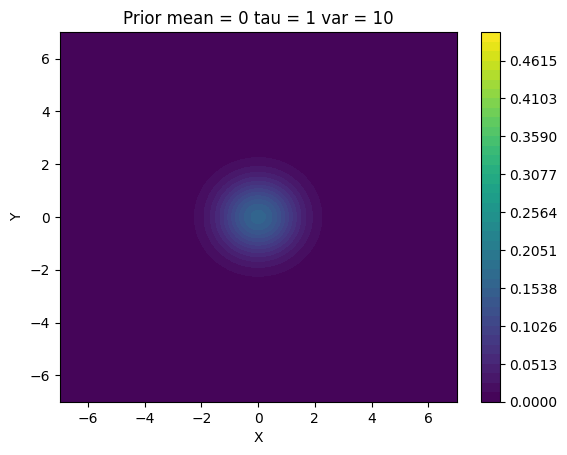

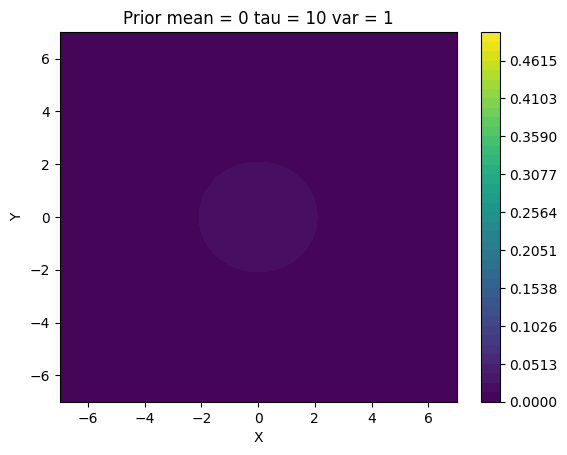

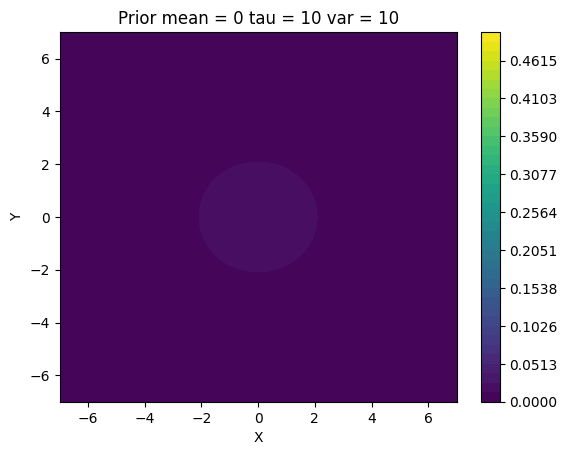

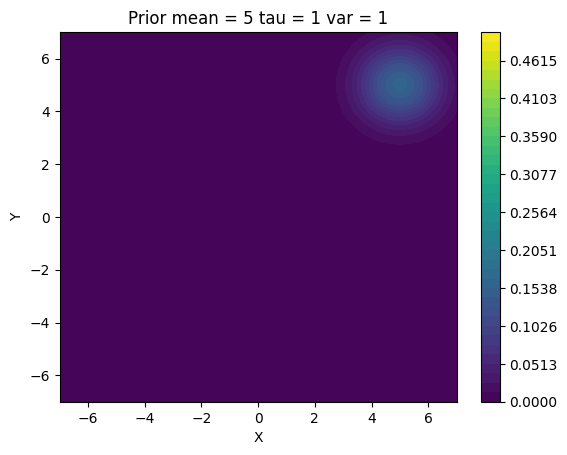

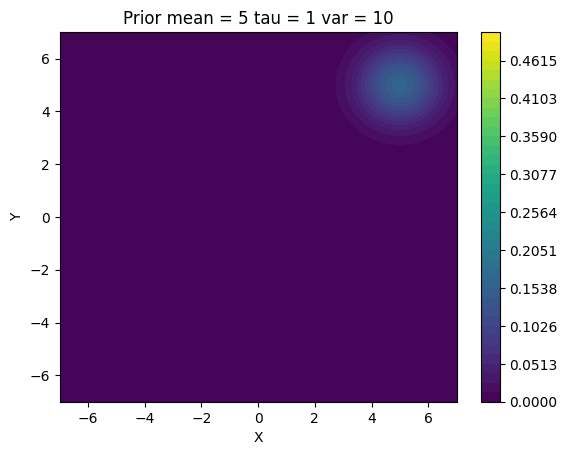

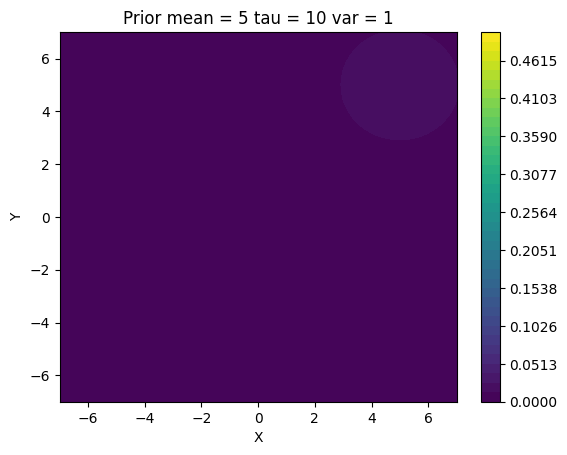

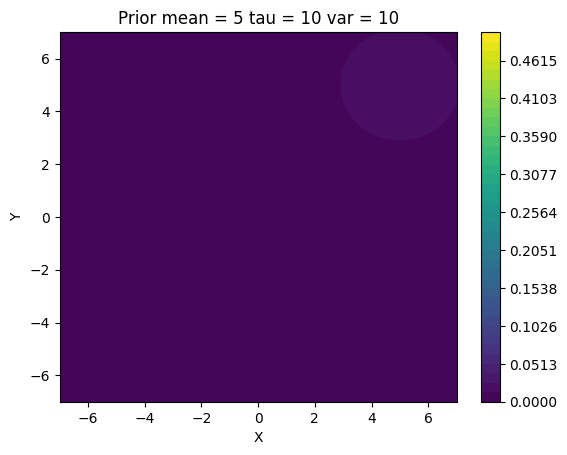

All posterior contour plots with 100 data points : 


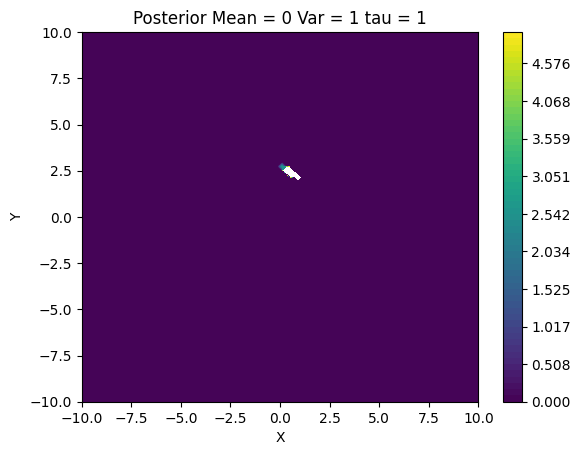

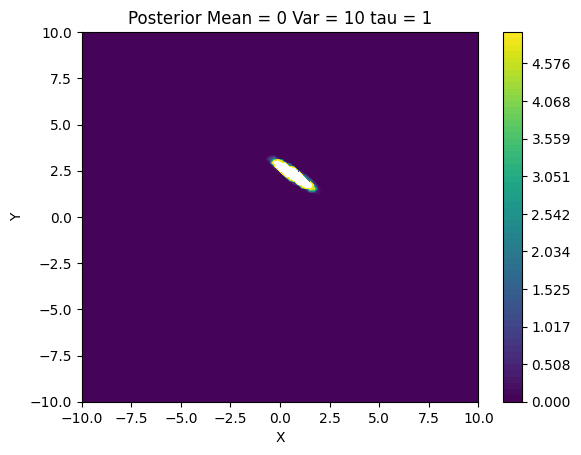

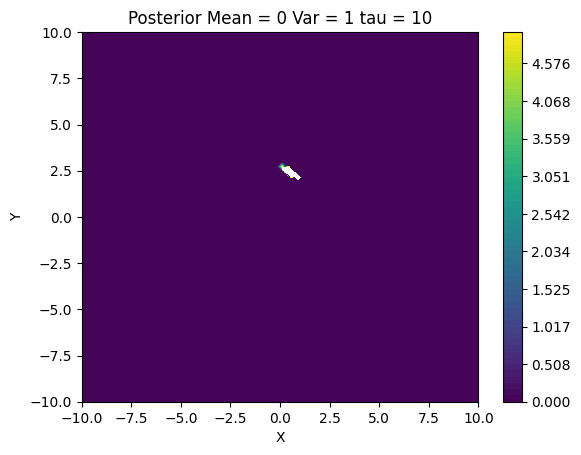

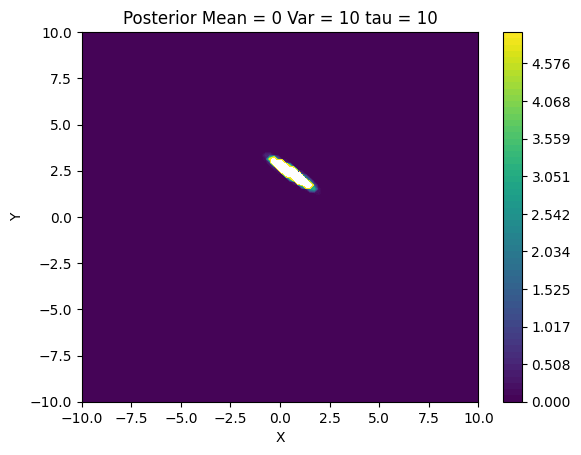

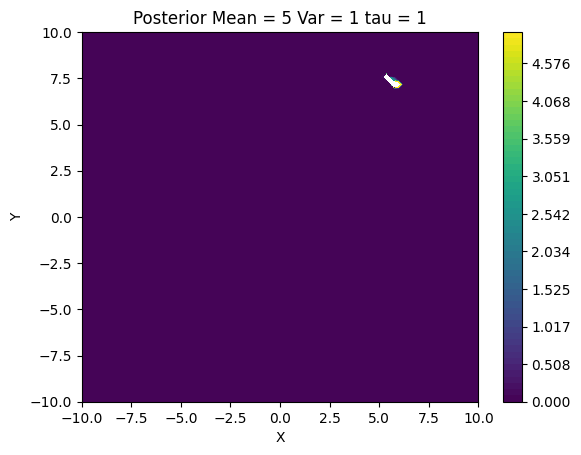

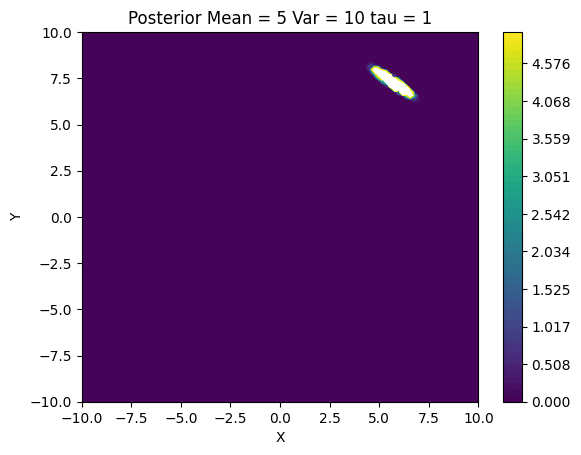

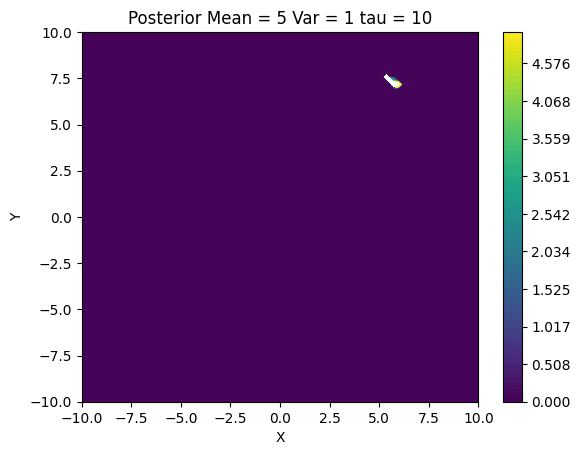

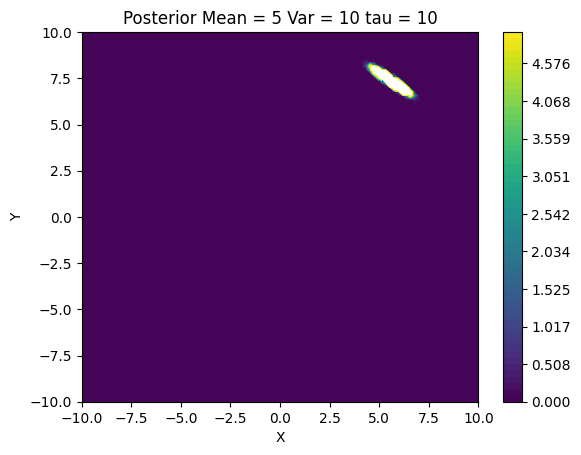

In [31]:
# Cell type : CodeWrite 

X = np.array([[1.0,2.0],[2.0,2.1],[0.6,1.5],[1.1,0.9]])
Y = np.array([5.1,6.1,4.2,2.9])

def contourprior(u,t,v=1):
    plt.figure()
    X,Y=np.meshgrid(np.linspace(-7,7,100),np.linspace(-7,7,100))
    Z = np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            Z[i,j] = np.exp(-0.5*((X[i,j]-u)**2+(Y[i,j]-u)**2)/t)/(2*np.pi*t)
    plt.contourf(X,Y,Z,levels=np.linspace(0, 0.5, 40))
    plt.title("Prior" + " mean = "+str(u)+" tau = "+str(t) + " var = "+str(v))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()


def contourposterior(X_train,Y_train,u,tou,var):
    n = X_train.shape[0]
    sigmainv = np.matmul(X_train.T,X_train)/var + np.identity(2)/tou
    #print(sigmainv)
    sigma = np.linalg.inv(sigmainv)
    mu = np.matmul(np.matmul(sigma,X_train.T),Y_train.reshape((n,1)))/var + np.ones((2,1))*u
    #print(mu)
    plt.figure()
    X,Y=np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
    #print(X.shape)
    Inp = np.concatenate((X.reshape(10000,1),Y.reshape(10000,1)),axis=1)
    #print(Inp.shape)
    Z = np.zeros((10000,1))
    c=0
    for i in range(10000):
        Z[i] = np.linalg.det(sigmainv)*np.exp(-0.5*np.matmul((Inp[i,:].reshape((2,1))-mu).T,np.matmul(sigmainv,Inp[i,:].reshape((2,1))-mu)))
    Z = Z.reshape(100,100)
            #print(Z[i,j])
    plt.contourf(X,Y,Z,levels=np.linspace(0, 5, 60))
    plt.title("Posterior" + " Mean = "+str(u)+" Var = "+str(var) + " tau = " + str(tou))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
    
        


X_100 = X
for i in range(99):
    X_100 = np.concatenate((X_100,X),axis=0)
#print(X_100.shape)
Y_100 = Y
for i in range(99):
    Y_100 = np.concatenate((Y_100,Y),axis=0)
#print(Y_100.shape)

print("All prior contour plots with 4 data points : ")
contourprior(0,1,1)
contourprior(0,1,10)
contourprior(0,10,1)
contourprior(0,10,10)
contourprior(5,1,1)
contourprior(5,1,10)
contourprior(5,10,1)
contourprior(5,10,10)

print("All posterior contour plots with 4 data points : ")
contourposterior(X,Y,0,1,1)
contourposterior(X,Y,0,1,10)
contourposterior(X,Y,0,10,1)
contourposterior(X,Y,0,10,10)
contourposterior(X,Y,5,1,1)
contourposterior(X,Y,5,1,10)
contourposterior(X,Y,5,10,1)
contourposterior(X,Y,5,10,10)

print("All prior contour plots with 100 data points : ")
contourprior(0,1,1)
contourprior(0,1,10)
contourprior(0,10,1)
contourprior(0,10,10)
contourprior(5,1,1)
contourprior(5,1,10)
contourprior(5,10,1)
contourprior(5,10,10)

print("All posterior contour plots with 100 data points : ")
contourposterior(X_100,Y_100,0,1,1)
contourposterior(X_100,Y_100,0,1,10)
contourposterior(X_100,Y_100,0,10,1)
contourposterior(X_100,Y_100,0,10,10)
contourposterior(X_100,Y_100,5,1,1)
contourposterior(X_100,Y_100,5,1,10)
contourposterior(X_100,Y_100,5,10,1)
contourposterior(X_100,Y_100,5,10,10)




In all prior plots we notice that on increasing $tau^2$ the prior distribution becomes less concentrated at the mean for both $mu_1$ = $mu_2$ = 0 and  $mu_1$ = $mu_2$ = 5 and we havr no dependence on $\sigma^2$ or number of training samples.

In all posterior plots :
1. Increasing $\tau^2$ makes the posterior distribution less concentrated at the mean.
2. Increasing $\sigma^2$ makes the posterior distribution tends to increase the effective distribution values.
3. Increasing number of training samples makes the posterior distribution move away from the prior distribution and more towards the data.
